# Surprise Housing Prediction

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [167]:
data=pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [168]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [169]:
# Remove Id, PoolQC, Fence, MiscFeature, MasVnrArea, WoodDeckSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PolArea, MiscVal

data=data.drop(['Id','PoolQC', 'Fence', 'MiscFeature', 'MasVnrArea', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','BsmtFinSF2', 'Alley','LowQualFinSF','Street','Utilities','Condition2','RoofMatl','Heating','KitchenAbvGr','PoolArea','LotFrontage','FireplaceQu','LandContour'], axis=1)
data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,...,GarageArea,GarageQual,GarageCond,PavedDrive,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Reg,Inside,Gtl,CollgCr,Norm,1Fam,2Story,...,548,TA,TA,Y,61,2,2008,WD,Normal,208500
1,20,RL,9600,Reg,FR2,Gtl,Veenker,Feedr,1Fam,1Story,...,460,TA,TA,Y,0,5,2007,WD,Normal,181500
2,60,RL,11250,IR1,Inside,Gtl,CollgCr,Norm,1Fam,2Story,...,608,TA,TA,Y,42,9,2008,WD,Normal,223500
3,70,RL,9550,IR1,Corner,Gtl,Crawfor,Norm,1Fam,2Story,...,642,TA,TA,Y,35,2,2006,WD,Abnorml,140000
4,60,RL,14260,IR1,FR2,Gtl,NoRidge,Norm,1Fam,2Story,...,836,TA,TA,Y,84,12,2008,WD,Normal,250000


In [170]:
data.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,OpenPorchSF,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,567.240411,1057.429452,1162.626712,...,2.866438,6.517808,0.613014,1978.506164,1.767123,472.980137,46.660274,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,441.866955,438.705324,386.587738,...,0.815778,1.625393,0.644666,24.689725,0.747315,213.804841,66.256028,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,223.000000,795.750000,882.000000,...,2.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,477.500000,991.500000,1087.000000,...,3.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,25.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,808.000000,1298.250000,1391.250000,...,3.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,68.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,2336.000000,6110.000000,4692.000000,...,8.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,547.000000,12.000000,2010.000000,755000.000000


<Axes: xlabel='LotArea', ylabel='SalePrice'>

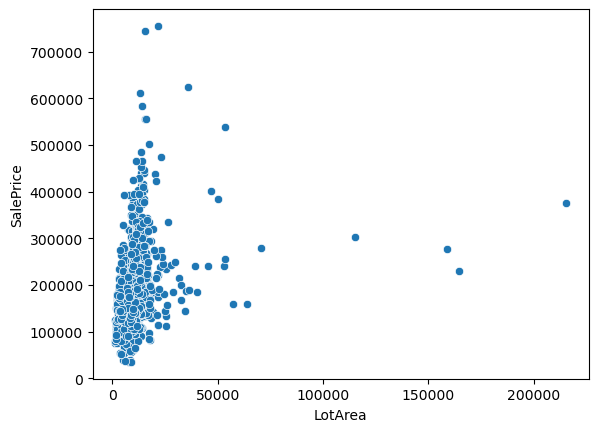

In [171]:
# Plotting a scatter plot
sns.scatterplot( data = data , x = 'LotArea' , y = 'SalePrice')

{'whiskers': [<matplotlib.lines.Line2D at 0x14075ed10>,
 'caps': [<matplotlib.lines.Line2D at 0x14075ff50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1402caf90>],
 'medians': [<matplotlib.lines.Line2D at 0x14076cc90>],
 'fliers': [<matplotlib.lines.Line2D at 0x14073c350>],
 'means': []}

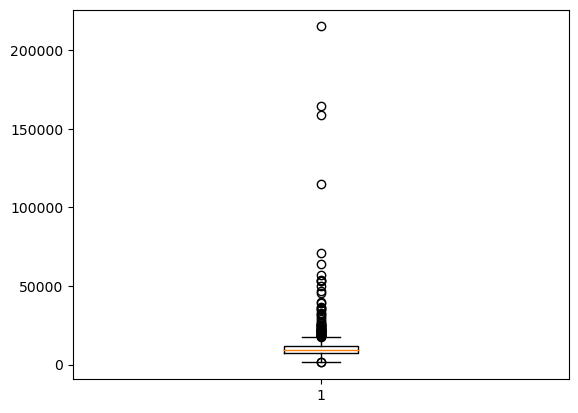

In [172]:
# Identifying probable outliers in SalePrice
plt.boxplot(data.LotArea)

In [173]:
# Lot Area > 70000 seems to be outliers. 

data=data[~((data.LotArea>35000))]

<Axes: xlabel='BsmtFinSF1', ylabel='SalePrice'>

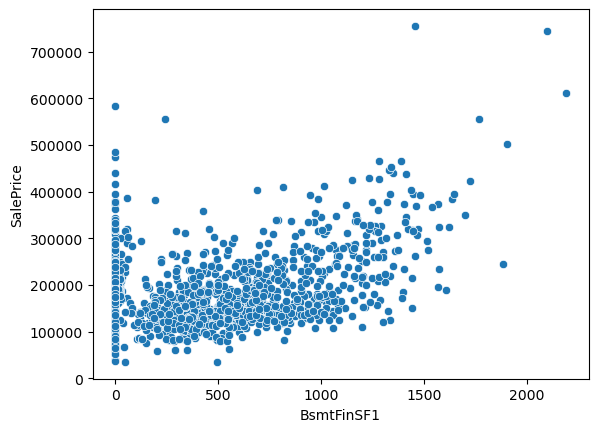

In [174]:
# Plotting a scatter plot
sns.scatterplot( data = data , x = 'BsmtFinSF1' , y = 'SalePrice')

In [175]:
# BsmtFinSF1 > 2500 seems to be outliers. 

data=data[~((data.BsmtFinSF1>3000))]

{'whiskers': [<matplotlib.lines.Line2D at 0x14102bc90>,
 'caps': [<matplotlib.lines.Line2D at 0x141039090>,
 'boxes': [<matplotlib.lines.Line2D at 0x14102b410>],
 'medians': [<matplotlib.lines.Line2D at 0x14103a210>],
 'fliers': [<matplotlib.lines.Line2D at 0x141009310>],
 'means': []}

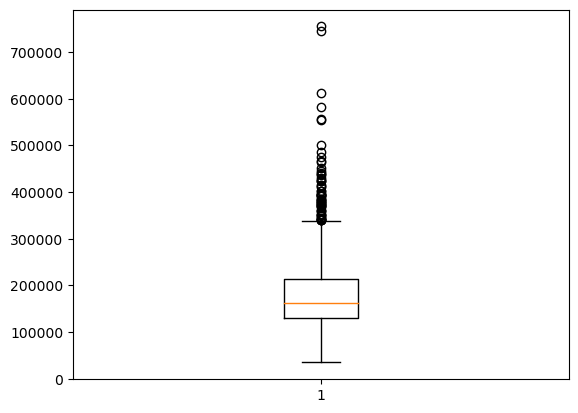

In [176]:
# Identifying probable outliers in SalePrice
plt.boxplot(data.SalePrice)

In [177]:
# SalePrice > 700000 seems to be outliers. 

data=data[~((data.SalePrice>500000))]

{'whiskers': [<matplotlib.lines.Line2D at 0x141097890>,
 'caps': [<matplotlib.lines.Line2D at 0x1410b0b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x141097090>],
 'medians': [<matplotlib.lines.Line2D at 0x1410b1c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1410b0190>],
 'means': []}

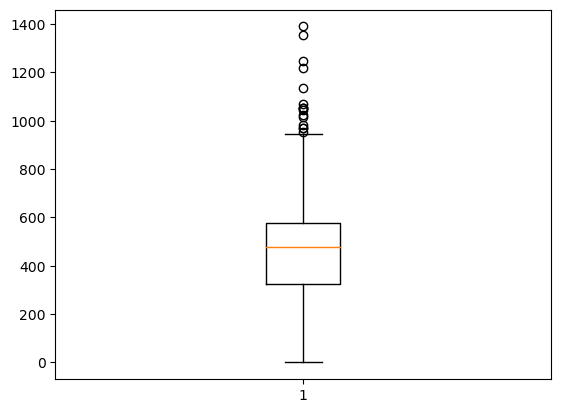

In [178]:
# Identifying probable outliers in SalePrice
plt.boxplot(data.GarageArea)

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

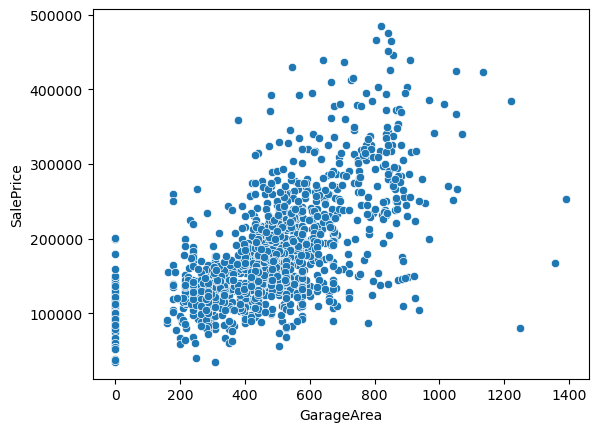

In [179]:
# Plotting a scatter plot
sns.scatterplot( data = data , x = 'GarageArea' , y = 'SalePrice')

In [180]:
# GarageArea > 1200 seems to be outliers. 

data=data[~((data.GarageArea>1200))]

In [181]:
data.shape

(1431, 58)

In [182]:
data=data.dropna(thresh=52)

In [183]:
data=data.dropna(subset=['GarageType', 'GarageYrBlt','GarageFinish'])

In [184]:
data.shape

(1350, 58)

In [185]:
#BsmtQual	BsmtCond	BsmtExposure	BsmtFinType1
data['BsmtQual'] = data['BsmtQual'].fillna('NB')
data['BsmtCond'] = data['BsmtCond'].fillna('NB')
data['BsmtExposure'] = data['BsmtExposure'].fillna('NB')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('NB')


In [186]:
# Derive variable age of house

data['age_of_house'] = data['YrSold'] - data['YearRemodAdd']

In [187]:

data=data.drop(['YearBuilt','YrSold','YearRemodAdd','GarageYrBlt','MoSold'], axis=1)
data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,OpenPorchSF,SaleType,SaleCondition,SalePrice,age_of_house
0,60,RL,8450,Reg,Inside,Gtl,CollgCr,Norm,1Fam,2Story,...,2,548,TA,TA,Y,61,WD,Normal,208500,5
1,20,RL,9600,Reg,FR2,Gtl,Veenker,Feedr,1Fam,1Story,...,2,460,TA,TA,Y,0,WD,Normal,181500,31
2,60,RL,11250,IR1,Inside,Gtl,CollgCr,Norm,1Fam,2Story,...,2,608,TA,TA,Y,42,WD,Normal,223500,6
3,70,RL,9550,IR1,Corner,Gtl,Crawfor,Norm,1Fam,2Story,...,3,642,TA,TA,Y,35,WD,Abnorml,140000,36
4,60,RL,14260,IR1,FR2,Gtl,NoRidge,Norm,1Fam,2Story,...,3,836,TA,TA,Y,84,WD,Normal,250000,8


### Creating Dummy variables


In [188]:
# mapping number category to string value.
data[['MSZoning']]=data[['MSZoning']].apply(lambda x: x.map({'A':'MSZoning_Agricultural','C (all)': 'MSZoning_Commercial', 'FV': 'MSZoning_Floating_Village_Residential','I':'MSZoning_Industrial','RH':'MSZoning_Residential_High_Density','RL':'MSZoning_Residential_Low_Density','RP':'MSZoning_Residential_Low_Density_Park','RM':'MSZoning_Residential_Medium_Density'}))
data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,OpenPorchSF,SaleType,SaleCondition,SalePrice,age_of_house
0,60,MSZoning_Residential_Low_Density,8450,Reg,Inside,Gtl,CollgCr,Norm,1Fam,2Story,...,2,548,TA,TA,Y,61,WD,Normal,208500,5
1,20,MSZoning_Residential_Low_Density,9600,Reg,FR2,Gtl,Veenker,Feedr,1Fam,1Story,...,2,460,TA,TA,Y,0,WD,Normal,181500,31
2,60,MSZoning_Residential_Low_Density,11250,IR1,Inside,Gtl,CollgCr,Norm,1Fam,2Story,...,2,608,TA,TA,Y,42,WD,Normal,223500,6
3,70,MSZoning_Residential_Low_Density,9550,IR1,Corner,Gtl,Crawfor,Norm,1Fam,2Story,...,3,642,TA,TA,Y,35,WD,Abnorml,140000,36
4,60,MSZoning_Residential_Low_Density,14260,IR1,FR2,Gtl,NoRidge,Norm,1Fam,2Story,...,3,836,TA,TA,Y,84,WD,Normal,250000,8


In [189]:
# creating dummy variables for MSZoning categories
MSZoning = pd.get_dummies(data['MSZoning'], drop_first=True)
MSZoning.head()


# concating the dummy variables with MSZoning dataframe
data=pd.concat([data,MSZoning], axis=1)
#print(data.head())
print(data.shape)

(1350, 58)


In [190]:
mapping = {
    20: "1-STORY 1946 & NEWER ALL STYLES",
    30: "1-STORY 1945 & OLDER",
    40: "1-STORY W/FINISHED ATTIC ALL AGES",
    45: "1-1/2 STORY - UNFINISHED ALL AGES",
    50: "1-1/2 STORY FINISHED ALL AGES",
    60: "2-STORY 1946 & NEWER",
    70: "2-STORY 1945 & OLDER",
    75: "2-1/2 STORY ALL AGES",
    80: "SPLIT OR MULTI-LEVEL",
    85: "SPLIT FOYER",
    90: "DUPLEX - ALL STYLES AND AGES",
    120: "1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
    150: "1-1/2 STORY PUD - ALL AGES",
    160: "2-STORY PUD - 1946 & NEWER",
    180: "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
    190: "2 FAMILY CONVERSION - ALL STYLES AND AGES"
}

# Replace the values with the mapping
data['MSSubClass'] = data['MSSubClass'].map(mapping)

# Create dummy variables
data = pd.get_dummies(data, columns=['MSSubClass'], drop_first=True)
#data.drop(['MSSubClass'])
data.head()

,MSZoning,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL
0,MSZoning_Residential_Low_Density,8450,Reg,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,...,0,0,0,0,1,0,0,0,0,0
1,MSZoning_Residential_Low_Density,9600,Reg,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,...,0,0,0,0,0,0,0,0,0,0
2,MSZoning_Residential_Low_Density,11250,IR1,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,...,0,0,0,0,1,0,0,0,0,0
3,MSZoning_Residential_Low_Density,9550,IR1,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,...,0,0,0,1,0,0,0,0,0,0
4,MSZoning_Residential_Low_Density,14260,IR1,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,...,0,0,0,0,1,0,0,0,0,0


In [191]:
data['LotShape'] = data[['LotShape']].apply(lambda x: x.map({'Reg': 'Regular', 'IR1': 'Slightly irregular', 'IR2': 'Moderately Irregular', 'IR3': 'Irregular'}))

dummy_df = pd.get_dummies(data['LotShape'], drop_first=True)
data = pd.concat([data, dummy_df], axis=1)
data.head()

,MSZoning,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,Moderately Irregular,Regular,Slightly irregular
0,MSZoning_Residential_Low_Density,8450,Regular,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,...,0,1,0,0,0,0,0,0,1,0
1,MSZoning_Residential_Low_Density,9600,Regular,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,...,0,0,0,0,0,0,0,0,1,0
2,MSZoning_Residential_Low_Density,11250,Slightly irregular,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,...,0,1,0,0,0,0,0,0,0,1
3,MSZoning_Residential_Low_Density,9550,Slightly irregular,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,...,1,0,0,0,0,0,0,0,0,1
4,MSZoning_Residential_Low_Density,14260,Slightly irregular,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,...,0,1,0,0,0,0,0,0,0,1


In [192]:
data['LotConfig'] =data[['LotConfig']].apply(lambda x: x.map({'Inside': 'Inside_lot', 'Corner': 'Corner_lot', 'CulDSac': 'Cul-de-sac', 'FR2': 'Frontage_on_2_sides_property', 'FR3': 'Frontage_3_sides_property'}))

# Create dummy variables
dummy_df = pd.get_dummies(data['LotConfig'], drop_first=True)
data = pd.concat([data, dummy_df], axis=1)
data.head()

,MSZoning,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,Moderately Irregular,Regular,Slightly irregular,Cul-de-sac,Frontage_3_sides_property,Frontage_on_2_sides_property,Inside_lot
0,MSZoning_Residential_Low_Density,8450,Regular,Inside_lot,Gtl,CollgCr,Norm,1Fam,2Story,7,...,0,0,0,0,1,0,0,0,0,1
1,MSZoning_Residential_Low_Density,9600,Regular,Frontage_on_2_sides_property,Gtl,Veenker,Feedr,1Fam,1Story,6,...,0,0,0,0,1,0,0,0,1,0
2,MSZoning_Residential_Low_Density,11250,Slightly irregular,Inside_lot,Gtl,CollgCr,Norm,1Fam,2Story,7,...,0,0,0,0,0,1,0,0,0,1
3,MSZoning_Residential_Low_Density,9550,Slightly irregular,Corner_lot,Gtl,Crawfor,Norm,1Fam,2Story,7,...,0,0,0,0,0,1,0,0,0,0
4,MSZoning_Residential_Low_Density,14260,Slightly irregular,Frontage_on_2_sides_property,Gtl,NoRidge,Norm,1Fam,2Story,8,...,0,0,0,0,0,1,0,0,1,0


In [193]:
data.to_csv('cleaned.csv')

In [194]:
data.shape

(1350, 78)

In [195]:
mapping = {
    'Blmngtn': 'Bloomington Heights',
    'Blueste': 'Bluestem',
    'BrDale': 'Briardale',
    'BrkSide': 'Brookside',
    'ClearCr': 'Clear Creek',
    'CollgCr': 'College Creek',
    'Crawfor': 'Crawford',
    'Edwards': 'Edwards',
    'Gilbert': 'Gilbert',
    'IDOTRR': 'Iowa DOT and Rail Road',
    'MeadowV': 'Meadow Village',
    'Mitchel': 'Mitchell',
    'NAmes': 'North Ames',
    'NoRidge': 'Northridge',
    'NPkVill': 'Northpark Villa',
    'NridgHt': 'Northridge Heights',
    'NWAmes': 'Northwest Ames',
    'OldTown': 'Old Town',
    'SWISU': 'South & West of Iowa State University',
    'Sawyer': 'Sawyer',
    'SawyerW': 'Sawyer West',
    'Somerst': 'Somerset',
    'StoneBr': 'Stone Brook',
    'Timber': 'Timberland',
    'Veenker': 'Veenker'
}


data['Neighborhood'] = data['Neighborhood'].map(mapping)

# Create dummy variables
dummies = pd.get_dummies(data['Neighborhood'], drop_first=True)

# Concatenate the dummy variables to the main dataframe
data = pd.concat([data, dummies], axis=1)

data.head()

,MSZoning,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,Northridge Heights,Northwest Ames,Old Town,Sawyer,Sawyer West,Somerset,South & West of Iowa State University,Stone Brook,Timberland,Veenker
0,MSZoning_Residential_Low_Density,8450,Regular,Inside_lot,Gtl,College Creek,Norm,1Fam,2Story,7,...,0,0,0,0,0,0,0,0,0,0
1,MSZoning_Residential_Low_Density,9600,Regular,Frontage_on_2_sides_property,Gtl,Veenker,Feedr,1Fam,1Story,6,...,0,0,0,0,0,0,0,0,0,1
2,MSZoning_Residential_Low_Density,11250,Slightly irregular,Inside_lot,Gtl,College Creek,Norm,1Fam,2Story,7,...,0,0,0,0,0,0,0,0,0,0
3,MSZoning_Residential_Low_Density,9550,Slightly irregular,Corner_lot,Gtl,Crawford,Norm,1Fam,2Story,7,...,0,0,0,0,0,0,0,0,0,0
4,MSZoning_Residential_Low_Density,14260,Slightly irregular,Frontage_on_2_sides_property,Gtl,Northridge,Norm,1Fam,2Story,8,...,0,0,0,0,0,0,0,0,0,0


In [196]:
dummies = pd.get_dummies(data[['Condition1','BldgType','HouseStyle','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition','GarageFinish','LandSlope']], drop_first=True)

# Concatenate the original DataFrame with the dummy DataFrame
data = pd.concat([data, dummies], axis=1)
data.head()

,MSZoning,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageFinish_RFn,GarageFinish_Unf,LandSlope_Mod,LandSlope_Sev
0,MSZoning_Residential_Low_Density,8450,Regular,Inside_lot,Gtl,College Creek,Norm,1Fam,2Story,7,...,1,0,0,0,1,0,1,0,0,0
1,MSZoning_Residential_Low_Density,9600,Regular,Frontage_on_2_sides_property,Gtl,Veenker,Feedr,1Fam,1Story,6,...,1,0,0,0,1,0,1,0,0,0
2,MSZoning_Residential_Low_Density,11250,Slightly irregular,Inside_lot,Gtl,College Creek,Norm,1Fam,2Story,7,...,1,0,0,0,1,0,1,0,0,0
3,MSZoning_Residential_Low_Density,9550,Slightly irregular,Corner_lot,Gtl,Crawford,Norm,1Fam,2Story,7,...,1,0,0,0,0,0,0,1,0,0
4,MSZoning_Residential_Low_Density,14260,Slightly irregular,Frontage_on_2_sides_property,Gtl,Northridge,Norm,1Fam,2Story,8,...,1,0,0,0,1,0,1,0,0,0


In [197]:
quality_mapping = {
    10: 'Very Excellent',
    9: 'Excellent',
    8: 'Very Good',
    7: 'Good',
    6: 'Above Average',
    5: 'Average',
    4: 'Below Average',
    3: 'Fair',
    2: 'Poor',
    1: 'Very Poor'
}
data['OverallQual'] = data['OverallQual'].map(quality_mapping)

# Now, create dummy variables
dummies = pd.get_dummies(data['OverallQual'],prefix='OverallQual', drop_first=True)

# Concatenate the dummy variables to the main DataFrame
data = pd.concat([data, dummies], axis=1)
data.head()

,MSZoning,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,LandSlope_Mod,LandSlope_Sev,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good
0,MSZoning_Residential_Low_Density,8450,Regular,Inside_lot,Gtl,College Creek,Norm,1Fam,2Story,Good,...,0,0,0,0,0,0,1,0,0,0
1,MSZoning_Residential_Low_Density,9600,Regular,Frontage_on_2_sides_property,Gtl,Veenker,Feedr,1Fam,1Story,Above Average,...,0,0,0,0,0,0,0,0,0,0
2,MSZoning_Residential_Low_Density,11250,Slightly irregular,Inside_lot,Gtl,College Creek,Norm,1Fam,2Story,Good,...,0,0,0,0,0,0,1,0,0,0
3,MSZoning_Residential_Low_Density,9550,Slightly irregular,Corner_lot,Gtl,Crawford,Norm,1Fam,2Story,Good,...,0,0,0,0,0,0,1,0,0,0
4,MSZoning_Residential_Low_Density,14260,Slightly irregular,Frontage_on_2_sides_property,Gtl,Northridge,Norm,1Fam,2Story,Very Good,...,0,0,0,0,0,0,0,0,0,1


In [198]:
quality_mapping = {
    10: 'Very Excellent',
    9: 'Excellent',
    8: 'Very Good',
    7: 'Good',
    6: 'Above Average',
    5: 'Average',
    4: 'Below Average',
    3: 'Fair',
    2: 'Poor',
    1: 'Very Poor'
}
data['OverallCond'] = data['OverallCond'].replace(quality_mapping)

# Now, create dummy variables
dummies = pd.get_dummies(data['OverallCond'],prefix='OverallCond', drop_first=True)

# Concatenate the dummy variables to the main DataFrame
data = pd.concat([data, dummies], axis=1)
data.head()

,MSZoning,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good
0,MSZoning_Residential_Low_Density,8450,Regular,Inside_lot,Gtl,College Creek,Norm,1Fam,2Story,Good,...,0,0,0,1,0,0,0,0,0,0
1,MSZoning_Residential_Low_Density,9600,Regular,Frontage_on_2_sides_property,Gtl,Veenker,Feedr,1Fam,1Story,Above Average,...,0,0,0,0,0,0,0,0,0,1
2,MSZoning_Residential_Low_Density,11250,Slightly irregular,Inside_lot,Gtl,College Creek,Norm,1Fam,2Story,Good,...,0,0,0,1,0,0,0,0,0,0
3,MSZoning_Residential_Low_Density,9550,Slightly irregular,Corner_lot,Gtl,Crawford,Norm,1Fam,2Story,Good,...,0,0,0,1,0,0,0,0,0,0
4,MSZoning_Residential_Low_Density,14260,Slightly irregular,Frontage_on_2_sides_property,Gtl,Northridge,Norm,1Fam,2Story,Very Good,...,0,0,1,1,0,0,0,0,0,0


In [199]:
quality_mapping = {
    'Ex': 'Excellent',
    'Gd': 'Good',
    'TA': 'Typical',
    'Fa': 'Fair',
    'Po': 'Poor',
    'NB': 'No_Basement'
}
data['BsmtQual'] = data['BsmtQual'].map(quality_mapping)

# Now, create dummy variables
dummies = pd.get_dummies(data['BsmtQual'],prefix='BsmtQual', drop_first=True)

# Concatenate the dummy variables to the main DataFrame
data = pd.concat([data, dummies], axis=1)
data.head()

,MSZoning,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,BsmtQual_Fair,BsmtQual_Good,BsmtQual_No_Basement,BsmtQual_Typical
0,MSZoning_Residential_Low_Density,8450,Regular,Inside_lot,Gtl,College Creek,Norm,1Fam,2Story,Good,...,0,0,0,0,0,0,0,1,0,0
1,MSZoning_Residential_Low_Density,9600,Regular,Frontage_on_2_sides_property,Gtl,Veenker,Feedr,1Fam,1Story,Above Average,...,0,0,0,0,0,1,0,1,0,0
2,MSZoning_Residential_Low_Density,11250,Slightly irregular,Inside_lot,Gtl,College Creek,Norm,1Fam,2Story,Good,...,0,0,0,0,0,0,0,1,0,0
3,MSZoning_Residential_Low_Density,9550,Slightly irregular,Corner_lot,Gtl,Crawford,Norm,1Fam,2Story,Good,...,0,0,0,0,0,0,0,0,0,1
4,MSZoning_Residential_Low_Density,14260,Slightly irregular,Frontage_on_2_sides_property,Gtl,Northridge,Norm,1Fam,2Story,Very Good,...,0,0,0,0,0,0,0,1,0,0


In [200]:
quality_mapping = {
    'Ex': 'Excellent',
    'Gd': 'Good',
    'TA': 'Typical',
    'Fa': 'Fair',
    'Po': 'Poor',
    'NB': 'No_Basement'
}
data['BsmtCond'] = data['BsmtCond'].replace(quality_mapping)

# Now, create dummy variables
dummies = pd.get_dummies(data['BsmtCond'],prefix='BsmtCond', drop_first=True)

# Concatenate the dummy variables to the main DataFrame
data = pd.concat([data, dummies], axis=1)
data.head()

,MSZoning,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,OverallCond_Poor,OverallCond_Very Good,BsmtQual_Fair,BsmtQual_Good,BsmtQual_No_Basement,BsmtQual_Typical,BsmtCond_Good,BsmtCond_No_Basement,BsmtCond_Poor,BsmtCond_Typical
0,MSZoning_Residential_Low_Density,8450,Regular,Inside_lot,Gtl,College Creek,Norm,1Fam,2Story,Good,...,0,0,0,1,0,0,0,0,0,1
1,MSZoning_Residential_Low_Density,9600,Regular,Frontage_on_2_sides_property,Gtl,Veenker,Feedr,1Fam,1Story,Above Average,...,0,1,0,1,0,0,0,0,0,1
2,MSZoning_Residential_Low_Density,11250,Slightly irregular,Inside_lot,Gtl,College Creek,Norm,1Fam,2Story,Good,...,0,0,0,1,0,0,0,0,0,1
3,MSZoning_Residential_Low_Density,9550,Slightly irregular,Corner_lot,Gtl,Crawford,Norm,1Fam,2Story,Good,...,0,0,0,0,0,1,1,0,0,0
4,MSZoning_Residential_Low_Density,14260,Slightly irregular,Frontage_on_2_sides_property,Gtl,Northridge,Norm,1Fam,2Story,Very Good,...,0,0,0,1,0,0,0,0,0,1


In [201]:
quality_mapping = {
    'Gd': 'Good',
    'Av': 'Average_exp',
    'Mn': 'Mimimum_Exposure',
    'No': 'No_Exposure',
    'NB': 'No_Basement'
}
data['BsmtCond'] = data['BsmtExposure'].replace(quality_mapping)

# Now, create dummy variables
dummies = pd.get_dummies(data['BsmtExposure'],prefix='BsmtExposure', drop_first=True)

# Concatenate the dummy variables to the main DataFrame
data = pd.concat([data, dummies], axis=1)
data.head()

,MSZoning,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,BsmtQual_No_Basement,BsmtQual_Typical,BsmtCond_Good,BsmtCond_No_Basement,BsmtCond_Poor,BsmtCond_Typical,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NB,BsmtExposure_No
0,MSZoning_Residential_Low_Density,8450,Regular,Inside_lot,Gtl,College Creek,Norm,1Fam,2Story,Good,...,0,0,0,0,0,1,0,0,0,1
1,MSZoning_Residential_Low_Density,9600,Regular,Frontage_on_2_sides_property,Gtl,Veenker,Feedr,1Fam,1Story,Above Average,...,0,0,0,0,0,1,1,0,0,0
2,MSZoning_Residential_Low_Density,11250,Slightly irregular,Inside_lot,Gtl,College Creek,Norm,1Fam,2Story,Good,...,0,0,0,0,0,1,0,1,0,0
3,MSZoning_Residential_Low_Density,9550,Slightly irregular,Corner_lot,Gtl,Crawford,Norm,1Fam,2Story,Good,...,0,1,1,0,0,0,0,0,0,1
4,MSZoning_Residential_Low_Density,14260,Slightly irregular,Frontage_on_2_sides_property,Gtl,Northridge,Norm,1Fam,2Story,Very Good,...,0,0,0,0,0,1,0,0,0,0


In [202]:
data=data.drop(['MSZoning','LotShape','LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition','OverallQual','OverallCond','BsmtQual','BsmtCond','BsmtExposure','GarageFinish','LandSlope'],axis=1)

data.head()

,LotArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,...,BsmtQual_No_Basement,BsmtQual_Typical,BsmtCond_Good,BsmtCond_No_Basement,BsmtCond_Poor,BsmtCond_Typical,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NB,BsmtExposure_No
0,8450,706,150,856,856,854,1710,1,0,2,...,0,0,0,0,0,1,0,0,0,1
1,9600,978,284,1262,1262,0,1262,0,1,2,...,0,0,0,0,0,1,1,0,0,0
2,11250,486,434,920,920,866,1786,1,0,2,...,0,0,0,0,0,1,0,1,0,0
3,9550,216,540,756,961,756,1717,1,0,1,...,0,1,1,0,0,0,0,0,0,1
4,14260,655,490,1145,1145,1053,2198,1,0,2,...,0,0,0,0,0,1,0,0,0,0


In [203]:
data.shape

(1350, 222)

In [204]:
data.to_csv('cleaned.csv')

### Split test and train set

In [205]:
# Splitting the dataset into training and test set with 70-30 ratio. 
df_train, df_test = train_test_split(data, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(944, 222)
(406, 222)


### Rescaling of variables

In [206]:
# Paradigm with most sklearn libraries classes
# fit() - learns xmin, xmax
# transform() - computes the x-xmin/xmax-xmin
# fit_transform() - same as fit and transform. 

# 1. Instantiate an object 

scaler = MinMaxScaler()

# 2. Fit on Data

num_vars = ['LotArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','OpenPorchSF','SalePrice','age_of_house']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,...,BsmtQual_No_Basement,BsmtQual_Typical,BsmtCond_Good,BsmtCond_No_Basement,BsmtCond_Poor,BsmtCond_Typical,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NB,BsmtExposure_No
1003,0.351906,0.000000,0.719178,0.525000,0.445161,0.0,0.406547,0.0,0.0,0.666667,...,0,1,0,0,0,1,0,0,0,1
327,0.355417,0.333137,0.350171,0.432188,0.338710,0.0,0.309329,0.0,0.0,0.333333,...,0,1,0,0,0,1,0,0,0,1
1078,0.103855,0.390330,0.079623,0.265000,0.146953,0.0,0.134206,0.5,0.0,0.333333,...,0,0,0,0,0,1,0,1,0,0
1127,0.459764,0.766509,0.098459,0.478125,0.391398,0.0,0.357447,0.5,0.0,0.666667,...,0,0,0,0,0,1,0,0,0,0
420,0.196019,0.771816,0.014983,0.420000,0.324731,0.0,0.296563,1.0,0.0,0.666667,...,0,0,1,0,0,0,1,0,0,0


In [207]:
# Starting off with one variable.
# Since Area has the highest correlation, we start with it. 

y_train  = df_train.pop('SalePrice')
X_train = df_train

In [208]:
# Applying RFE on linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=100)
rfe = rfe.fit(X_train, y_train)

In [209]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 84),
 ('BsmtHalfBath', False, 31),
 ('FullBath', False, 26),
 ('HalfBath', False, 44),
 ('BedroomAbvGr', False, 103),
 ('TotRmsAbvGrd', False, 77),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('OpenPorchSF', True, 1),
 ('age_of_house', True, 1),
 ('MSZoning_Floating_Village_Residential', True, 1),
 ('MSZoning_Residential_High_Density', True, 1),
 ('MSZoning_Residential_Low_Density', True, 1),
 ('MSZoning_Residential_Medium_Density', True, 1),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', True, 1),
 ('MSSubClass_1-STORY 1945 & OLDER', True, 1),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', False, 38),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', True, 1),
 ('MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES', False, 52),
 ('MSSubClass_

In [210]:
# variables that RFE retained
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'Fireplaces', 'GarageCars', 'GarageArea',
       'OpenPorchSF', 'age_of_house', 'MSZoning_Floating_Village_Residential',
       'MSZoning_Residential_High_Density', 'MSZoning_Residential_Low_Density',
       'MSZoning_Residential_Medium_Density',
       'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
       'MSSubClass_1-STORY 1945 & OLDER',
       'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
       'MSSubClass_2-1/2 STORY ALL AGES', 'MSSubClass_2-STORY 1946 & NEWER',
       'MSSubClass_DUPLEX - ALL STYLES AND AGES',
       'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       'Frontage_3_sides_property', 'Bluestem', 'Brookside', 'Clear Creek',
       'College Creek', 'Edwards', 'Gilbert', 'Iowa DOT and Rail Road',
       'Meadow Village', 'Mitchell', 'North Ames', 'Northwest Ames',
       'Old T

In [211]:
# Variables dropped by RFE
X_train.columns[~rfe.support_]

Index(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
       'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
       'MSSubClass_2-STORY 1945 & OLDER',
       'MSSubClass_2-STORY PUD - 1946 & NEWER',
       ...
       'OverallCond_Average', 'OverallCond_Good', 'OverallCond_Poor',
       'OverallCond_Very Good', 'BsmtQual_Fair', 'BsmtCond_Good',
       'BsmtCond_Typical', 'BsmtExposure_Mn', 'BsmtExposure_NB',
       'BsmtExposure_No'],
      dtype='object', length=121)

In [212]:
# creating X_test dataframe with RFE selected variables

X_train_cols = X_train[col]

In [213]:
X_train_cols = sm.add_constant(X_train_cols)

In [214]:
lm = sm.OLS(y_train, X_train_cols).fit()

In [215]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     140.0
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:44   Log-Likelihood:                 1708.0
No. Observations:                 944   AIC:                            -3234.
Df Residuals:                     853   BIC:                            -2793.
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1353      0.051      2.639      0.008       0.035       0.236
LotArea                                                              0.0695      0.015      4.616      0.000       0.040       0.099
BsmtFinSF1                                                           0.0495      0.015      3.254      0.001       0.020       0.079
BsmtUnfSF                                                           -0.0379      0.020     -1.852      0.064      -0.078       0.002
TotalBsmtSF                                                          0.2360      0.041      5.745      0.000       0.155       0.317
1stFlrSF                                                             0.0996      0.114      0.876      0.381      -0.124       0.323
2ndFlrSF                                                             0.1267      0.071      1.792      0.074      -0.012       0.266
GrLivArea                                                            0.1706      0.120      1.417      0.157      -0.066       0.407
Fireplaces                                                           0.0197      0.008      2.421      0.016       0.004       0.036
GarageCars                                                           0.0234      0.015      1.589      0.112      -0.006       0.052
GarageArea                                                           0.0496      0.016      3.116      0.002       0.018       0.081
OpenPorchSF                                                          0.0190      0.011      1.789      0.074      -0.002       0.040
age_of_house                                                        -0.0330      0.007     -5.014      0.000      -0.046      -0.020
MSZoning_Floating_Village_Residential                                0.1093      0.026      4.226      0.000       0.059       0.160
MSZoning_Residential_High_Density                                    0.0733      0.028      2.651      0.008       0.019       0.128
MSZoning_Residential_Low_Density                                     0.0839      0.023      3.696      0.000       0.039       0.128
MSZoning_Residential_Medium_Density                                  0.0872      0.022      4.043      0.000       0.045       0.129
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0264      0.008     -3.436      0.001      -0.041      -0.011
MSSubClass_1-STORY 1945 & OLDER                                     -0.0332      0.009     -3.519      0.000      -0.052      -0.015
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0339      0.007     -4.646      0.000      -0.048      -0.020
MSSubClass_2 FAMILY CONV

In [216]:
# Dropping GarageQual_Gd as it has high p-value
X_train_rfe_new = X_train_cols.drop(['GarageCond_TA'], axis=1)

In [217]:
# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     140.0
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:44   Log-Likelihood:                 1708.0
No. Observations:                 944   AIC:                            -3234.
Df Residuals:                     853   BIC:                            -2793.
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1353      0.051      2.639      0.008       0.035       0.236
LotArea                                                              0.0695      0.015      4.616      0.000       0.040       0.099
BsmtFinSF1                                                           0.0495      0.015      3.254      0.001       0.020       0.079
BsmtUnfSF                                                           -0.0379      0.020     -1.852      0.064      -0.078       0.002
TotalBsmtSF                                                          0.2360      0.041      5.745      0.000       0.155       0.317
1stFlrSF                                                             0.0996      0.114      0.876      0.381      -0.124       0.323
2ndFlrSF                                                             0.1267      0.071      1.792      0.074      -0.012       0.266
GrLivArea                                                            0.1706      0.120      1.417      0.157      -0.066       0.407
Fireplaces                                                           0.0197      0.008      2.421      0.016       0.004       0.036
GarageCars                                                           0.0234      0.015      1.589      0.112      -0.006       0.052
GarageArea                                                           0.0496      0.016      3.116      0.002       0.018       0.081
OpenPorchSF                                                          0.0190      0.011      1.789      0.074      -0.002       0.040
age_of_house                                                        -0.0330      0.007     -5.014      0.000      -0.046      -0.020
MSZoning_Floating_Village_Residential                                0.1093      0.026      4.226      0.000       0.059       0.160
MSZoning_Residential_High_Density                                    0.0733      0.028      2.651      0.008       0.019       0.128
MSZoning_Residential_Low_Density                                     0.0839      0.023      3.696      0.000       0.039       0.128
MSZoning_Residential_Medium_Density                                  0.0872      0.022      4.043      0.000       0.045       0.129
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0264      0.008     -3.436      0.001      -0.041      -0.011
MSSubClass_1-STORY 1945 & OLDER                                     -0.0332      0.009     -3.519      0.000      -0.052      -0.015
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0339      0.007     -4.646      0.000      -0.048      -0.020
MSSubClass_2 FAMILY CONV

In [218]:
# Dropping HeatingQC_Po	 as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['Bluestem'], axis=1)

In [219]:
col=X_train_rfe_new.columns
col

Index(['const', 'LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'Fireplaces', 'GarageCars',
       'GarageArea', 'OpenPorchSF', 'age_of_house',
       'MSZoning_Floating_Village_Residential',
       'MSZoning_Residential_High_Density', 'MSZoning_Residential_Low_Density',
       'MSZoning_Residential_Medium_Density',
       'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
       'MSSubClass_1-STORY 1945 & OLDER',
       'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
       'MSSubClass_2-1/2 STORY ALL AGES', 'MSSubClass_2-STORY 1946 & NEWER',
       'MSSubClass_DUPLEX - ALL STYLES AND AGES',
       'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       'Frontage_3_sides_property', 'Brookside', 'Clear Creek',
       'College Creek', 'Edwards', 'Gilbert', 'Iowa DOT and Rail Road',
       'Meadow Village', 'Mitchell', 'North Ames', 'Northwest Ames',
       'O

In [220]:
# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     140.0
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:45   Log-Likelihood:                 1708.0
No. Observations:                 944   AIC:                            -3234.
Df Residuals:                     853   BIC:                            -2793.
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1353      0.051      2.639      0.008       0.035       0.236
LotArea                                                              0.0695      0.015      4.616      0.000       0.040       0.099
BsmtFinSF1                                                           0.0495      0.015      3.254      0.001       0.020       0.079
BsmtUnfSF                                                           -0.0379      0.020     -1.852      0.064      -0.078       0.002
TotalBsmtSF                                                          0.2360      0.041      5.745      0.000       0.155       0.317
1stFlrSF                                                             0.0996      0.114      0.876      0.381      -0.124       0.323
2ndFlrSF                                                             0.1267      0.071      1.792      0.074      -0.012       0.266
GrLivArea                                                            0.1706      0.120      1.417      0.157      -0.066       0.407
Fireplaces                                                           0.0197      0.008      2.421      0.016       0.004       0.036
GarageCars                                                           0.0234      0.015      1.589      0.112      -0.006       0.052
GarageArea                                                           0.0496      0.016      3.116      0.002       0.018       0.081
OpenPorchSF                                                          0.0190      0.011      1.789      0.074      -0.002       0.040
age_of_house                                                        -0.0330      0.007     -5.014      0.000      -0.046      -0.020
MSZoning_Floating_Village_Residential                                0.1093      0.026      4.226      0.000       0.059       0.160
MSZoning_Residential_High_Density                                    0.0733      0.028      2.651      0.008       0.019       0.128
MSZoning_Residential_Low_Density                                     0.0839      0.023      3.696      0.000       0.039       0.128
MSZoning_Residential_Medium_Density                                  0.0872      0.022      4.043      0.000       0.045       0.129
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0264      0.008     -3.436      0.001      -0.041      -0.011
MSSubClass_1-STORY 1945 & OLDER                                     -0.0332      0.009     -3.519      0.000      -0.052      -0.015
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0339      0.007     -4.646      0.000      -0.048      -0.020
MSSubClass_2 FAMILY CONV

In [221]:
# Dropping Functional_Sev as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['Exterior2nd_CBlock'], axis=1)

# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     140.0
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:45   Log-Likelihood:                 1708.0
No. Observations:                 944   AIC:                            -3234.
Df Residuals:                     853   BIC:                            -2793.
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1353      0.051      2.639      0.008       0.035       0.236
LotArea                                                              0.0695      0.015      4.616      0.000       0.040       0.099
BsmtFinSF1                                                           0.0495      0.015      3.254      0.001       0.020       0.079
BsmtUnfSF                                                           -0.0379      0.020     -1.852      0.064      -0.078       0.002
TotalBsmtSF                                                          0.2360      0.041      5.745      0.000       0.155       0.317
1stFlrSF                                                             0.0996      0.114      0.876      0.381      -0.124       0.323
2ndFlrSF                                                             0.1267      0.071      1.792      0.074      -0.012       0.266
GrLivArea                                                            0.1706      0.120      1.417      0.157      -0.066       0.407
Fireplaces                                                           0.0197      0.008      2.421      0.016       0.004       0.036
GarageCars                                                           0.0234      0.015      1.589      0.112      -0.006       0.052
GarageArea                                                           0.0496      0.016      3.116      0.002       0.018       0.081
OpenPorchSF                                                          0.0190      0.011      1.789      0.074      -0.002       0.040
age_of_house                                                        -0.0330      0.007     -5.014      0.000      -0.046      -0.020
MSZoning_Floating_Village_Residential                                0.1093      0.026      4.226      0.000       0.059       0.160
MSZoning_Residential_High_Density                                    0.0733      0.028      2.651      0.008       0.019       0.128
MSZoning_Residential_Low_Density                                     0.0839      0.023      3.696      0.000       0.039       0.128
MSZoning_Residential_Medium_Density                                  0.0872      0.022      4.043      0.000       0.045       0.129
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0264      0.008     -3.436      0.001      -0.041      -0.011
MSSubClass_1-STORY 1945 & OLDER                                     -0.0332      0.009     -3.519      0.000      -0.052      -0.015
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0339      0.007     -4.646      0.000      -0.048      -0.020
MSSubClass_2 FAMILY CONV

In [222]:
# Dropping HeatingQC_Po as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['Electrical_Mix'], axis=1)

# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     140.0
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:45   Log-Likelihood:                 1708.0
No. Observations:                 944   AIC:                            -3234.
Df Residuals:                     853   BIC:                            -2793.
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1353      0.051      2.639      0.008       0.035       0.236
LotArea                                                              0.0695      0.015      4.616      0.000       0.040       0.099
BsmtFinSF1                                                           0.0495      0.015      3.254      0.001       0.020       0.079
BsmtUnfSF                                                           -0.0379      0.020     -1.852      0.064      -0.078       0.002
TotalBsmtSF                                                          0.2360      0.041      5.745      0.000       0.155       0.317
1stFlrSF                                                             0.0996      0.114      0.876      0.381      -0.124       0.323
2ndFlrSF                                                             0.1267      0.071      1.792      0.074      -0.012       0.266
GrLivArea                                                            0.1706      0.120      1.417      0.157      -0.066       0.407
Fireplaces                                                           0.0197      0.008      2.421      0.016       0.004       0.036
GarageCars                                                           0.0234      0.015      1.589      0.112      -0.006       0.052
GarageArea                                                           0.0496      0.016      3.116      0.002       0.018       0.081
OpenPorchSF                                                          0.0190      0.011      1.789      0.074      -0.002       0.040
age_of_house                                                        -0.0330      0.007     -5.014      0.000      -0.046      -0.020
MSZoning_Floating_Village_Residential                                0.1093      0.026      4.226      0.000       0.059       0.160
MSZoning_Residential_High_Density                                    0.0733      0.028      2.651      0.008       0.019       0.128
MSZoning_Residential_Low_Density                                     0.0839      0.023      3.696      0.000       0.039       0.128
MSZoning_Residential_Medium_Density                                  0.0872      0.022      4.043      0.000       0.045       0.129
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0264      0.008     -3.436      0.001      -0.041      -0.011
MSSubClass_1-STORY 1945 & OLDER                                     -0.0332      0.009     -3.519      0.000      -0.052      -0.015
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0339      0.007     -4.646      0.000      -0.048      -0.020
MSSubClass_2 FAMILY CONV

In [223]:
# Dropping BsmtQual_No_Basement as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['Exterior1st_CBlock'], axis=1)

# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     140.0
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:45   Log-Likelihood:                 1708.0
No. Observations:                 944   AIC:                            -3234.
Df Residuals:                     853   BIC:                            -2793.
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1353      0.051      2.639      0.008       0.035       0.236
LotArea                                                              0.0695      0.015      4.616      0.000       0.040       0.099
BsmtFinSF1                                                           0.0495      0.015      3.254      0.001       0.020       0.079
BsmtUnfSF                                                           -0.0379      0.020     -1.852      0.064      -0.078       0.002
TotalBsmtSF                                                          0.2360      0.041      5.745      0.000       0.155       0.317
1stFlrSF                                                             0.0996      0.114      0.876      0.381      -0.124       0.323
2ndFlrSF                                                             0.1267      0.071      1.792      0.074      -0.012       0.266
GrLivArea                                                            0.1706      0.120      1.417      0.157      -0.066       0.407
Fireplaces                                                           0.0197      0.008      2.421      0.016       0.004       0.036
GarageCars                                                           0.0234      0.015      1.589      0.112      -0.006       0.052
GarageArea                                                           0.0496      0.016      3.116      0.002       0.018       0.081
OpenPorchSF                                                          0.0190      0.011      1.789      0.074      -0.002       0.040
age_of_house                                                        -0.0330      0.007     -5.014      0.000      -0.046      -0.020
MSZoning_Floating_Village_Residential                                0.1093      0.026      4.226      0.000       0.059       0.160
MSZoning_Residential_High_Density                                    0.0733      0.028      2.651      0.008       0.019       0.128
MSZoning_Residential_Low_Density                                     0.0839      0.023      3.696      0.000       0.039       0.128
MSZoning_Residential_Medium_Density                                  0.0872      0.022      4.043      0.000       0.045       0.129
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0264      0.008     -3.436      0.001      -0.041      -0.011
MSSubClass_1-STORY 1945 & OLDER                                     -0.0332      0.009     -3.519      0.000      -0.052      -0.015
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0339      0.007     -4.646      0.000      -0.048      -0.020
MSSubClass_2 FAMILY CONV

In [224]:
# Dropping BsmtCond_No_Basement as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['BsmtCond_Poor'], axis=1)

# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     141.7
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:46   Log-Likelihood:                 1708.0
No. Observations:                 944   AIC:                            -3236.
Df Residuals:                     854   BIC:                            -2800.
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1352      0.051      2.638      0.008       0.035       0.236
LotArea                                                              0.0696      0.015      4.623      0.000       0.040       0.099
BsmtFinSF1                                                           0.0494      0.015      3.254      0.001       0.020       0.079
BsmtUnfSF                                                           -0.0380      0.020     -1.854      0.064      -0.078       0.002
TotalBsmtSF                                                          0.2361      0.041      5.753      0.000       0.156       0.317
1stFlrSF                                                             0.0995      0.114      0.875      0.382      -0.124       0.323
2ndFlrSF                                                             0.1267      0.071      1.792      0.073      -0.012       0.265
GrLivArea                                                            0.1706      0.120      1.418      0.156      -0.066       0.407
Fireplaces                                                           0.0197      0.008      2.419      0.016       0.004       0.036
GarageCars                                                           0.0234      0.015      1.586      0.113      -0.006       0.052
GarageArea                                                           0.0496      0.016      3.121      0.002       0.018       0.081
OpenPorchSF                                                          0.0190      0.011      1.793      0.073      -0.002       0.040
age_of_house                                                        -0.0331      0.007     -5.023      0.000      -0.046      -0.020
MSZoning_Floating_Village_Residential                                0.1091      0.026      4.224      0.000       0.058       0.160
MSZoning_Residential_High_Density                                    0.0731      0.028      2.647      0.008       0.019       0.127
MSZoning_Residential_Low_Density                                     0.0837      0.023      3.693      0.000       0.039       0.128
MSZoning_Residential_Medium_Density                                  0.0870      0.022      4.041      0.000       0.045       0.129
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0263      0.008     -3.436      0.001      -0.041      -0.011
MSSubClass_1-STORY 1945 & OLDER                                     -0.0333      0.009     -3.561      0.000      -0.052      -0.015
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0339      0.007     -4.649      0.000      -0.048      -0.020
MSSubClass_2 FAMILY CONV

In [225]:
# Dropping Exterior2nd_AsphShn as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['SaleType_Oth'], axis=1)

# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     141.7
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:46   Log-Likelihood:                 1708.0
No. Observations:                 944   AIC:                            -3236.
Df Residuals:                     854   BIC:                            -2800.
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1352      0.051      2.638      0.008       0.035       0.236
LotArea                                                              0.0696      0.015      4.623      0.000       0.040       0.099
BsmtFinSF1                                                           0.0494      0.015      3.254      0.001       0.020       0.079
BsmtUnfSF                                                           -0.0380      0.020     -1.854      0.064      -0.078       0.002
TotalBsmtSF                                                          0.2361      0.041      5.753      0.000       0.156       0.317
1stFlrSF                                                             0.0995      0.114      0.875      0.382      -0.124       0.323
2ndFlrSF                                                             0.1267      0.071      1.792      0.073      -0.012       0.265
GrLivArea                                                            0.1706      0.120      1.418      0.156      -0.066       0.407
Fireplaces                                                           0.0197      0.008      2.419      0.016       0.004       0.036
GarageCars                                                           0.0234      0.015      1.586      0.113      -0.006       0.052
GarageArea                                                           0.0496      0.016      3.121      0.002       0.018       0.081
OpenPorchSF                                                          0.0190      0.011      1.793      0.073      -0.002       0.040
age_of_house                                                        -0.0331      0.007     -5.023      0.000      -0.046      -0.020
MSZoning_Floating_Village_Residential                                0.1091      0.026      4.224      0.000       0.058       0.160
MSZoning_Residential_High_Density                                    0.0731      0.028      2.647      0.008       0.019       0.127
MSZoning_Residential_Low_Density                                     0.0837      0.023      3.693      0.000       0.039       0.128
MSZoning_Residential_Medium_Density                                  0.0870      0.022      4.041      0.000       0.045       0.129
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0263      0.008     -3.436      0.001      -0.041      -0.011
MSSubClass_1-STORY 1945 & OLDER                                     -0.0333      0.009     -3.561      0.000      -0.052      -0.015
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0339      0.007     -4.649      0.000      -0.048      -0.020
MSSubClass_2 FAMILY CONV

In [226]:
# Dropping Exterior1st_ImStucc as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['BsmtFinType1_NB'], axis=1)

# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     141.7
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:46   Log-Likelihood:                 1708.0
No. Observations:                 944   AIC:                            -3236.
Df Residuals:                     854   BIC:                            -2800.
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1352      0.051      2.638      0.008       0.035       0.236
LotArea                                                              0.0696      0.015      4.623      0.000       0.040       0.099
BsmtFinSF1                                                           0.0494      0.015      3.254      0.001       0.020       0.079
BsmtUnfSF                                                           -0.0380      0.020     -1.854      0.064      -0.078       0.002
TotalBsmtSF                                                          0.2361      0.041      5.753      0.000       0.156       0.317
1stFlrSF                                                             0.0995      0.114      0.875      0.382      -0.124       0.323
2ndFlrSF                                                             0.1267      0.071      1.792      0.073      -0.012       0.265
GrLivArea                                                            0.1706      0.120      1.418      0.156      -0.066       0.407
Fireplaces                                                           0.0197      0.008      2.419      0.016       0.004       0.036
GarageCars                                                           0.0234      0.015      1.586      0.113      -0.006       0.052
GarageArea                                                           0.0496      0.016      3.121      0.002       0.018       0.081
OpenPorchSF                                                          0.0190      0.011      1.793      0.073      -0.002       0.040
age_of_house                                                        -0.0331      0.007     -5.023      0.000      -0.046      -0.020
MSZoning_Floating_Village_Residential                                0.1091      0.026      4.224      0.000       0.058       0.160
MSZoning_Residential_High_Density                                    0.0731      0.028      2.647      0.008       0.019       0.127
MSZoning_Residential_Low_Density                                     0.0837      0.023      3.693      0.000       0.039       0.128
MSZoning_Residential_Medium_Density                                  0.0870      0.022      4.041      0.000       0.045       0.129
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0263      0.008     -3.436      0.001      -0.041      -0.011
MSSubClass_1-STORY 1945 & OLDER                                     -0.0333      0.009     -3.561      0.000      -0.052      -0.015
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0339      0.007     -4.649      0.000      -0.048      -0.020
MSSubClass_2 FAMILY CONV

In [227]:
# Dropping Electrical_FuseP as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['GarageQual_Gd'], axis=1)


# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     143.5
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:46   Log-Likelihood:                 1708.0
No. Observations:                 944   AIC:                            -3238.
Df Residuals:                     855   BIC:                            -2806.
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1439      0.035      4.141      0.000       0.076       0.212
LotArea                                                              0.0696      0.015      4.628      0.000       0.040       0.099
BsmtFinSF1                                                           0.0494      0.015      3.252      0.001       0.020       0.079
BsmtUnfSF                                                           -0.0380      0.020     -1.859      0.063      -0.078       0.002
TotalBsmtSF                                                          0.2361      0.041      5.756      0.000       0.156       0.317
1stFlrSF                                                             0.0997      0.114      0.877      0.381      -0.123       0.323
2ndFlrSF                                                             0.1267      0.071      1.793      0.073      -0.012       0.265
GrLivArea                                                            0.1706      0.120      1.418      0.156      -0.065       0.407
Fireplaces                                                           0.0197      0.008      2.430      0.015       0.004       0.036
GarageCars                                                           0.0234      0.015      1.590      0.112      -0.005       0.052
GarageArea                                                           0.0496      0.016      3.123      0.002       0.018       0.081
OpenPorchSF                                                          0.0191      0.011      1.802      0.072      -0.002       0.040
age_of_house                                                        -0.0331      0.007     -5.041      0.000      -0.046      -0.020
MSZoning_Floating_Village_Residential                                0.1092      0.026      4.229      0.000       0.059       0.160
MSZoning_Residential_High_Density                                    0.0732      0.028      2.652      0.008       0.019       0.127
MSZoning_Residential_Low_Density                                     0.0838      0.023      3.698      0.000       0.039       0.128
MSZoning_Residential_Medium_Density                                  0.0870      0.022      4.045      0.000       0.045       0.129
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0263      0.008     -3.432      0.001      -0.041      -0.011
MSSubClass_1-STORY 1945 & OLDER                                     -0.0333      0.009     -3.559      0.000      -0.052      -0.015
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0339      0.007     -4.650      0.000      -0.048      -0.020
MSSubClass_2 FAMILY CONV

In [228]:
# Dropping Exterior2nd_CBlock as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['HeatingQC_Po'], axis=1)

# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     143.5
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:46   Log-Likelihood:                 1708.0
No. Observations:                 944   AIC:                            -3238.
Df Residuals:                     855   BIC:                            -2806.
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1439      0.035      4.141      0.000       0.076       0.212
LotArea                                                              0.0696      0.015      4.628      0.000       0.040       0.099
BsmtFinSF1                                                           0.0494      0.015      3.252      0.001       0.020       0.079
BsmtUnfSF                                                           -0.0380      0.020     -1.859      0.063      -0.078       0.002
TotalBsmtSF                                                          0.2361      0.041      5.756      0.000       0.156       0.317
1stFlrSF                                                             0.0997      0.114      0.877      0.381      -0.123       0.323
2ndFlrSF                                                             0.1267      0.071      1.793      0.073      -0.012       0.265
GrLivArea                                                            0.1706      0.120      1.418      0.156      -0.065       0.407
Fireplaces                                                           0.0197      0.008      2.430      0.015       0.004       0.036
GarageCars                                                           0.0234      0.015      1.590      0.112      -0.005       0.052
GarageArea                                                           0.0496      0.016      3.123      0.002       0.018       0.081
OpenPorchSF                                                          0.0191      0.011      1.802      0.072      -0.002       0.040
age_of_house                                                        -0.0331      0.007     -5.041      0.000      -0.046      -0.020
MSZoning_Floating_Village_Residential                                0.1092      0.026      4.229      0.000       0.059       0.160
MSZoning_Residential_High_Density                                    0.0732      0.028      2.652      0.008       0.019       0.127
MSZoning_Residential_Low_Density                                     0.0838      0.023      3.698      0.000       0.039       0.128
MSZoning_Residential_Medium_Density                                  0.0870      0.022      4.045      0.000       0.045       0.129
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0263      0.008     -3.432      0.001      -0.041      -0.011
MSSubClass_1-STORY 1945 & OLDER                                     -0.0333      0.009     -3.559      0.000      -0.052      -0.015
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0339      0.007     -4.650      0.000      -0.048      -0.020
MSSubClass_2 FAMILY CONV

In [229]:
# Dropping Exterior1st_ImStucc as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['BsmtCond_No_Basement'], axis=1)

# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     143.5
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:46   Log-Likelihood:                 1708.0
No. Observations:                 944   AIC:                            -3238.
Df Residuals:                     855   BIC:                            -2806.
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1439      0.035      4.141      0.000       0.076       0.212
LotArea                                                              0.0696      0.015      4.628      0.000       0.040       0.099
BsmtFinSF1                                                           0.0494      0.015      3.252      0.001       0.020       0.079
BsmtUnfSF                                                           -0.0380      0.020     -1.859      0.063      -0.078       0.002
TotalBsmtSF                                                          0.2361      0.041      5.756      0.000       0.156       0.317
1stFlrSF                                                             0.0997      0.114      0.877      0.381      -0.123       0.323
2ndFlrSF                                                             0.1267      0.071      1.793      0.073      -0.012       0.265
GrLivArea                                                            0.1706      0.120      1.418      0.156      -0.065       0.407
Fireplaces                                                           0.0197      0.008      2.430      0.015       0.004       0.036
GarageCars                                                           0.0234      0.015      1.590      0.112      -0.005       0.052
GarageArea                                                           0.0496      0.016      3.123      0.002       0.018       0.081
OpenPorchSF                                                          0.0191      0.011      1.802      0.072      -0.002       0.040
age_of_house                                                        -0.0331      0.007     -5.041      0.000      -0.046      -0.020
MSZoning_Floating_Village_Residential                                0.1092      0.026      4.229      0.000       0.059       0.160
MSZoning_Residential_High_Density                                    0.0732      0.028      2.652      0.008       0.019       0.127
MSZoning_Residential_Low_Density                                     0.0838      0.023      3.698      0.000       0.039       0.128
MSZoning_Residential_Medium_Density                                  0.0870      0.022      4.045      0.000       0.045       0.129
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0263      0.008     -3.432      0.001      -0.041      -0.011
MSSubClass_1-STORY 1945 & OLDER                                     -0.0333      0.009     -3.559      0.000      -0.052      -0.015
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0339      0.007     -4.650      0.000      -0.048      -0.020
MSSubClass_2 FAMILY CONV

In [230]:
# Dropping OverallQual_Poor as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['BsmtQual_No_Basement'], axis=1)

# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     145.2
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:47   Log-Likelihood:                 1707.9
No. Observations:                 944   AIC:                            -3240.
Df Residuals:                     856   BIC:                            -2813.
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1413      0.034      4.114      0.000       0.074       0.209
LotArea                                                              0.0696      0.015      4.630      0.000       0.040       0.099
BsmtFinSF1                                                           0.0493      0.015      3.247      0.001       0.019       0.079
BsmtUnfSF                                                           -0.0381      0.020     -1.865      0.063      -0.078       0.002
TotalBsmtSF                                                          0.2439      0.038      6.421      0.000       0.169       0.318
1stFlrSF                                                             0.0929      0.113      0.824      0.410      -0.128       0.314
2ndFlrSF                                                             0.1259      0.071      1.783      0.075      -0.013       0.264
GrLivArea                                                            0.1731      0.120      1.442      0.150      -0.063       0.409
Fireplaces                                                           0.0198      0.008      2.436      0.015       0.004       0.036
GarageCars                                                           0.0232      0.015      1.580      0.115      -0.006       0.052
GarageArea                                                           0.0497      0.016      3.131      0.002       0.019       0.081
OpenPorchSF                                                          0.0190      0.011      1.790      0.074      -0.002       0.040
age_of_house                                                        -0.0333      0.007     -5.071      0.000      -0.046      -0.020
MSZoning_Floating_Village_Residential                                0.1093      0.026      4.237      0.000       0.059       0.160
MSZoning_Residential_High_Density                                    0.0736      0.028      2.671      0.008       0.020       0.128
MSZoning_Residential_Low_Density                                     0.0838      0.023      3.702      0.000       0.039       0.128
MSZoning_Residential_Medium_Density                                  0.0871      0.021      4.053      0.000       0.045       0.129
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0261      0.008     -3.411      0.001      -0.041      -0.011
MSSubClass_1-STORY 1945 & OLDER                                     -0.0328      0.009     -3.527      0.000      -0.051      -0.015
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0336      0.007     -4.630      0.000      -0.048      -0.019
MSSubClass_2 FAMILY CONV

In [231]:
# Dropping HouseStyle_2.5Fin as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['SaleCondition_Partial'], axis=1)

In [232]:
# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     147.0
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:47   Log-Likelihood:                 1707.7
No. Observations:                 944   AIC:                            -3241.
Df Residuals:                     857   BIC:                            -2819.
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1404      0.034      4.093      0.000       0.073       0.208
LotArea                                                              0.0693      0.015      4.615      0.000       0.040       0.099
BsmtFinSF1                                                           0.0491      0.015      3.236      0.001       0.019       0.079
BsmtUnfSF                                                           -0.0385      0.020     -1.882      0.060      -0.079       0.002
TotalBsmtSF                                                          0.2440      0.038      6.425      0.000       0.169       0.318
1stFlrSF                                                             0.0927      0.113      0.822      0.411      -0.129       0.314
2ndFlrSF                                                             0.1256      0.071      1.780      0.076      -0.013       0.264
GrLivArea                                                            0.1739      0.120      1.449      0.148      -0.062       0.409
Fireplaces                                                           0.0197      0.008      2.429      0.015       0.004       0.036
GarageCars                                                           0.0238      0.015      1.621      0.105      -0.005       0.053
GarageArea                                                           0.0496      0.016      3.123      0.002       0.018       0.081
OpenPorchSF                                                          0.0190      0.011      1.798      0.073      -0.002       0.040
age_of_house                                                        -0.0333      0.007     -5.082      0.000      -0.046      -0.020
MSZoning_Floating_Village_Residential                                0.1091      0.026      4.232      0.000       0.059       0.160
MSZoning_Residential_High_Density                                    0.0737      0.028      2.674      0.008       0.020       0.128
MSZoning_Residential_Low_Density                                     0.0838      0.023      3.703      0.000       0.039       0.128
MSZoning_Residential_Medium_Density                                  0.0870      0.021      4.048      0.000       0.045       0.129
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0258      0.008     -3.387      0.001      -0.041      -0.011
MSSubClass_1-STORY 1945 & OLDER                                     -0.0325      0.009     -3.500      0.000      -0.051      -0.014
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0335      0.007     -4.616      0.000      -0.048      -0.019
MSSubClass_2 FAMILY CONV

In [233]:
# Dropping LandSlope_Sev as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['GarageQual_Po'], axis=1)

# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     148.9
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:47   Log-Likelihood:                 1707.5
No. Observations:                 944   AIC:                            -3243.
Df Residuals:                     858   BIC:                            -2826.
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1360      0.034      4.051      0.000       0.070       0.202
LotArea                                                              0.0691      0.015      4.605      0.000       0.040       0.099
BsmtFinSF1                                                           0.0491      0.015      3.237      0.001       0.019       0.079
BsmtUnfSF                                                           -0.0387      0.020     -1.892      0.059      -0.079       0.001
TotalBsmtSF                                                          0.2430      0.038      6.407      0.000       0.169       0.317
1stFlrSF                                                             0.0955      0.113      0.849      0.396      -0.125       0.316
2ndFlrSF                                                             0.1271      0.070      1.803      0.072      -0.011       0.265
GrLivArea                                                            0.1717      0.120      1.432      0.153      -0.064       0.407
Fireplaces                                                           0.0199      0.008      2.448      0.015       0.004       0.036
GarageCars                                                           0.0241      0.015      1.646      0.100      -0.005       0.053
GarageArea                                                           0.0495      0.016      3.118      0.002       0.018       0.081
OpenPorchSF                                                          0.0193      0.011      1.831      0.067      -0.001       0.040
age_of_house                                                        -0.0334      0.007     -5.093      0.000      -0.046      -0.021
MSZoning_Floating_Village_Residential                                0.1088      0.026      4.222      0.000       0.058       0.159
MSZoning_Residential_High_Density                                    0.0732      0.028      2.659      0.008       0.019       0.127
MSZoning_Residential_Low_Density                                     0.0835      0.023      3.693      0.000       0.039       0.128
MSZoning_Residential_Medium_Density                                  0.0866      0.021      4.031      0.000       0.044       0.129
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0258      0.008     -3.388      0.001      -0.041      -0.011
MSSubClass_1-STORY 1945 & OLDER                                     -0.0327      0.009     -3.527      0.000      -0.051      -0.014
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0334      0.007     -4.602      0.000      -0.048      -0.019
MSSubClass_2 FAMILY CONV

In [234]:
# Dropping Electrical_Mix as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['1stFlrSF'], axis=1)

# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     150.7
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:47   Log-Likelihood:                 1707.1
No. Observations:                 944   AIC:                            -3244.
Df Residuals:                     859   BIC:                            -2832.
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1355      0.034      4.038      0.000       0.070       0.201
LotArea                                                              0.0687      0.015      4.582      0.000       0.039       0.098
BsmtFinSF1                                                           0.0493      0.015      3.257      0.001       0.020       0.079
BsmtUnfSF                                                           -0.0381      0.020     -1.868      0.062      -0.078       0.002
TotalBsmtSF                                                          0.2470      0.038      6.568      0.000       0.173       0.321
2ndFlrSF                                                             0.0705      0.023      3.094      0.002       0.026       0.115
GrLivArea                                                            0.2706      0.028      9.627      0.000       0.215       0.326
Fireplaces                                                           0.0202      0.008      2.502      0.013       0.004       0.036
GarageCars                                                           0.0245      0.015      1.674      0.094      -0.004       0.053
GarageArea                                                           0.0485      0.016      3.064      0.002       0.017       0.080
OpenPorchSF                                                          0.0196      0.011      1.856      0.064      -0.001       0.040
age_of_house                                                        -0.0333      0.007     -5.078      0.000      -0.046      -0.020
MSZoning_Floating_Village_Residential                                0.1086      0.026      4.213      0.000       0.058       0.159
MSZoning_Residential_High_Density                                    0.0735      0.028      2.669      0.008       0.019       0.128
MSZoning_Residential_Low_Density                                     0.0836      0.023      3.696      0.000       0.039       0.128
MSZoning_Residential_Medium_Density                                  0.0864      0.021      4.026      0.000       0.044       0.129
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0270      0.008     -3.592      0.000      -0.042      -0.012
MSSubClass_1-STORY 1945 & OLDER                                     -0.0325      0.009     -3.515      0.000      -0.051      -0.014
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0335      0.007     -4.626      0.000      -0.048      -0.019
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES                -0.0527      0.012     -4.265      0.000      -0.077      -0.028
MSSubClass_2-1/2 STORY A

In [235]:
# Dropping Condition1_RRNe as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['GarageCond_Gd'], axis=1)

# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     152.5
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:47   Log-Likelihood:                 1706.5
No. Observations:                 944   AIC:                            -3245.
Df Residuals:                     860   BIC:                            -2838.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1414      0.033      4.281      0.000       0.077       0.206
LotArea                                                              0.0686      0.015      4.569      0.000       0.039       0.098
BsmtFinSF1                                                           0.0490      0.015      3.238      0.001       0.019       0.079
BsmtUnfSF                                                           -0.0387      0.020     -1.894      0.059      -0.079       0.001
TotalBsmtSF                                                          0.2468      0.038      6.561      0.000       0.173       0.321
2ndFlrSF                                                             0.0707      0.023      3.102      0.002       0.026       0.115
GrLivArea                                                            0.2714      0.028      9.659      0.000       0.216       0.327
Fireplaces                                                           0.0202      0.008      2.491      0.013       0.004       0.036
GarageCars                                                           0.0249      0.015      1.699      0.090      -0.004       0.054
GarageArea                                                           0.0483      0.016      3.051      0.002       0.017       0.079
OpenPorchSF                                                          0.0200      0.011      1.894      0.059      -0.001       0.041
age_of_house                                                        -0.0332      0.007     -5.062      0.000      -0.046      -0.020
MSZoning_Floating_Village_Residential                                0.1087      0.026      4.220      0.000       0.058       0.159
MSZoning_Residential_High_Density                                    0.0739      0.028      2.686      0.007       0.020       0.128
MSZoning_Residential_Low_Density                                     0.0839      0.023      3.710      0.000       0.040       0.128
MSZoning_Residential_Medium_Density                                  0.0867      0.021      4.037      0.000       0.045       0.129
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0274      0.007     -3.658      0.000      -0.042      -0.013
MSSubClass_1-STORY 1945 & OLDER                                     -0.0329      0.009     -3.559      0.000      -0.051      -0.015
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0336      0.007     -4.636      0.000      -0.048      -0.019
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES                -0.0538      0.012     -4.368      0.000      -0.078      -0.030
MSSubClass_2-1/2 STORY A

In [236]:
# Dropping Exterior2nd_BrkFace as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['Foundation_Stone'], axis=1)

# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     154.4
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:47   Log-Likelihood:                 1706.1
No. Observations:                 944   AIC:                            -3246.
Df Residuals:                     861   BIC:                            -2844.
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1437      0.033      4.363      0.000       0.079       0.208
LotArea                                                              0.0684      0.015      4.560      0.000       0.039       0.098
BsmtFinSF1                                                           0.0492      0.015      3.246      0.001       0.019       0.079
BsmtUnfSF                                                           -0.0383      0.020     -1.878      0.061      -0.078       0.002
TotalBsmtSF                                                          0.2449      0.038      6.521      0.000       0.171       0.319
2ndFlrSF                                                             0.0704      0.023      3.092      0.002       0.026       0.115
GrLivArea                                                            0.2725      0.028      9.707      0.000       0.217       0.328
Fireplaces                                                           0.0202      0.008      2.493      0.013       0.004       0.036
GarageCars                                                           0.0245      0.015      1.676      0.094      -0.004       0.053
GarageArea                                                           0.0482      0.016      3.045      0.002       0.017       0.079
OpenPorchSF                                                          0.0200      0.011      1.895      0.058      -0.001       0.041
age_of_house                                                        -0.0334      0.007     -5.100      0.000      -0.046      -0.021
MSZoning_Floating_Village_Residential                                0.1087      0.026      4.220      0.000       0.058       0.159
MSZoning_Residential_High_Density                                    0.0741      0.028      2.694      0.007       0.020       0.128
MSZoning_Residential_Low_Density                                     0.0841      0.023      3.718      0.000       0.040       0.128
MSZoning_Residential_Medium_Density                                  0.0868      0.021      4.046      0.000       0.045       0.129
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0274      0.007     -3.660      0.000      -0.042      -0.013
MSSubClass_1-STORY 1945 & OLDER                                     -0.0330      0.009     -3.567      0.000      -0.051      -0.015
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0338      0.007     -4.662      0.000      -0.048      -0.020
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES                -0.0527      0.012     -4.301      0.000      -0.077      -0.029
MSSubClass_2-1/2 STORY A

In [237]:
# Dropping Exterior2nd_CBlock as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER'], axis=1)

# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     156.2
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:48   Log-Likelihood:                 1705.4
No. Observations:                 944   AIC:                            -3247.
Df Residuals:                     862   BIC:                            -2849.
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1417      0.033      4.310      0.000       0.077       0.206
LotArea                                                              0.0691      0.015      4.607      0.000       0.040       0.098
BsmtFinSF1                                                           0.0488      0.015      3.219      0.001       0.019       0.078
BsmtUnfSF                                                           -0.0389      0.020     -1.909      0.057      -0.079       0.001
TotalBsmtSF                                                          0.2485      0.037      6.640      0.000       0.175       0.322
2ndFlrSF                                                             0.0707      0.023      3.103      0.002       0.026       0.115
GrLivArea                                                            0.2714      0.028      9.672      0.000       0.216       0.326
Fireplaces                                                           0.0204      0.008      2.523      0.012       0.005       0.036
GarageCars                                                           0.0245      0.015      1.675      0.094      -0.004       0.053
GarageArea                                                           0.0480      0.016      3.036      0.002       0.017       0.079
OpenPorchSF                                                          0.0198      0.011      1.881      0.060      -0.001       0.041
age_of_house                                                        -0.0330      0.007     -5.050      0.000      -0.046      -0.020
MSZoning_Floating_Village_Residential                                0.1095      0.026      4.250      0.000       0.059       0.160
MSZoning_Residential_High_Density                                    0.0747      0.028      2.715      0.007       0.021       0.129
MSZoning_Residential_Low_Density                                     0.0851      0.023      3.764      0.000       0.041       0.129
MSZoning_Residential_Medium_Density                                  0.0867      0.021      4.038      0.000       0.045       0.129
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0268      0.007     -3.589      0.000      -0.041      -0.012
MSSubClass_1-STORY 1945 & OLDER                                     -0.0322      0.009     -3.488      0.001      -0.050      -0.014
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0328      0.007     -4.564      0.000      -0.047      -0.019
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES                -0.0525      0.012     -4.278      0.000      -0.077      -0.028
MSSubClass_2-1/2 STORY A

In [238]:
# Dropping GarageCond_Po as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['Exterior1st_ImStucc'], axis=1)

# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     158.0
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:48   Log-Likelihood:                 1704.5
No. Observations:                 944   AIC:                            -3247.
Df Residuals:                     863   BIC:                            -2854.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1419      0.033      4.314      0.000       0.077       0.206
LotArea                                                              0.0688      0.015      4.585      0.000       0.039       0.098
BsmtFinSF1                                                           0.0483      0.015      3.188      0.001       0.019       0.078
BsmtUnfSF                                                           -0.0387      0.020     -1.894      0.059      -0.079       0.001
TotalBsmtSF                                                          0.2485      0.037      6.639      0.000       0.175       0.322
2ndFlrSF                                                             0.0710      0.023      3.118      0.002       0.026       0.116
GrLivArea                                                            0.2719      0.028      9.688      0.000       0.217       0.327
Fireplaces                                                           0.0205      0.008      2.529      0.012       0.005       0.036
GarageCars                                                           0.0236      0.015      1.615      0.107      -0.005       0.052
GarageArea                                                           0.0485      0.016      3.064      0.002       0.017       0.080
OpenPorchSF                                                          0.0194      0.011      1.839      0.066      -0.001       0.040
age_of_house                                                        -0.0331      0.007     -5.063      0.000      -0.046      -0.020
MSZoning_Floating_Village_Residential                                0.1092      0.026      4.238      0.000       0.059       0.160
MSZoning_Residential_High_Density                                    0.0746      0.028      2.709      0.007       0.021       0.129
MSZoning_Residential_Low_Density                                     0.0850      0.023      3.761      0.000       0.041       0.129
MSZoning_Residential_Medium_Density                                  0.0866      0.021      4.033      0.000       0.044       0.129
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0268      0.007     -3.589      0.000      -0.042      -0.012
MSSubClass_1-STORY 1945 & OLDER                                     -0.0320      0.009     -3.470      0.001      -0.050      -0.014
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0324      0.007     -4.505      0.000      -0.047      -0.018
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES                -0.0524      0.012     -4.269      0.000      -0.076      -0.028
MSSubClass_2-1/2 STORY A

In [239]:
# Dropping RoofStyle_Gambrel as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['Frontage_3_sides_property'], axis=1)

# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     159.9
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:48   Log-Likelihood:                 1703.5
No. Observations:                 944   AIC:                            -3247.
Df Residuals:                     864   BIC:                            -2859.
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1413      0.033      4.293      0.000       0.077       0.206
LotArea                                                              0.0676      0.015      4.512      0.000       0.038       0.097
BsmtFinSF1                                                           0.0482      0.015      3.182      0.002       0.018       0.078
BsmtUnfSF                                                           -0.0386      0.020     -1.891      0.059      -0.079       0.001
TotalBsmtSF                                                          0.2472      0.037      6.602      0.000       0.174       0.321
2ndFlrSF                                                             0.0709      0.023      3.112      0.002       0.026       0.116
GrLivArea                                                            0.2727      0.028      9.715      0.000       0.218       0.328
Fireplaces                                                           0.0206      0.008      2.546      0.011       0.005       0.037
GarageCars                                                           0.0238      0.015      1.625      0.105      -0.005       0.052
GarageArea                                                           0.0482      0.016      3.048      0.002       0.017       0.079
OpenPorchSF                                                          0.0199      0.011      1.888      0.059      -0.001       0.041
age_of_house                                                        -0.0327      0.007     -5.006      0.000      -0.046      -0.020
MSZoning_Floating_Village_Residential                                0.1106      0.026      4.295      0.000       0.060       0.161
MSZoning_Residential_High_Density                                    0.0764      0.028      2.775      0.006       0.022       0.130
MSZoning_Residential_Low_Density                                     0.0867      0.023      3.840      0.000       0.042       0.131
MSZoning_Residential_Medium_Density                                  0.0869      0.021      4.044      0.000       0.045       0.129
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0267      0.007     -3.569      0.000      -0.041      -0.012
MSSubClass_1-STORY 1945 & OLDER                                     -0.0315      0.009     -3.421      0.001      -0.050      -0.013
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0326      0.007     -4.530      0.000      -0.047      -0.018
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES                -0.0521      0.012     -4.249      0.000      -0.076      -0.028
MSSubClass_2-1/2 STORY A

In [240]:
# Dropping RoofStyle_Mansard as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['SaleCondition_AdjLand'], axis=1)

# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     161.7
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:48   Log-Likelihood:                 1702.4
No. Observations:                 944   AIC:                            -3247.
Df Residuals:                     865   BIC:                            -2864.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1418      0.033      4.306      0.000       0.077       0.206
LotArea                                                              0.0674      0.015      4.496      0.000       0.038       0.097
BsmtFinSF1                                                           0.0484      0.015      3.191      0.001       0.019       0.078
BsmtUnfSF                                                           -0.0385      0.020     -1.882      0.060      -0.079       0.002
TotalBsmtSF                                                          0.2478      0.037      6.614      0.000       0.174       0.321
2ndFlrSF                                                             0.0710      0.023      3.115      0.002       0.026       0.116
GrLivArea                                                            0.2720      0.028      9.684      0.000       0.217       0.327
Fireplaces                                                           0.0204      0.008      2.517      0.012       0.004       0.036
GarageCars                                                           0.0239      0.015      1.632      0.103      -0.005       0.053
GarageArea                                                           0.0477      0.016      3.015      0.003       0.017       0.079
OpenPorchSF                                                          0.0199      0.011      1.885      0.060      -0.001       0.041
age_of_house                                                        -0.0325      0.007     -4.974      0.000      -0.045      -0.020
MSZoning_Floating_Village_Residential                                0.1107      0.026      4.295      0.000       0.060       0.161
MSZoning_Residential_High_Density                                    0.0763      0.028      2.771      0.006       0.022       0.130
MSZoning_Residential_Low_Density                                     0.0869      0.023      3.847      0.000       0.043       0.131
MSZoning_Residential_Medium_Density                                  0.0869      0.021      4.043      0.000       0.045       0.129
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0257      0.007     -3.452      0.001      -0.040      -0.011
MSSubClass_1-STORY 1945 & OLDER                                     -0.0313      0.009     -3.390      0.001      -0.049      -0.013
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0325      0.007     -4.520      0.000      -0.047      -0.018
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES                -0.0520      0.012     -4.233      0.000      -0.076      -0.028
MSSubClass_2-1/2 STORY A

In [241]:
# Dropping Exterior1st_BrkComm as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['RoofStyle_Shed'], axis=1)

# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     163.5
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:48   Log-Likelihood:                 1701.1
No. Observations:                 944   AIC:                            -3246.
Df Residuals:                     866   BIC:                            -2868.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1424      0.033      4.322      0.000       0.078       0.207
LotArea                                                              0.0652      0.015      4.371      0.000       0.036       0.095
BsmtFinSF1                                                           0.0491      0.015      3.237      0.001       0.019       0.079
BsmtUnfSF                                                           -0.0373      0.020     -1.826      0.068      -0.077       0.003
TotalBsmtSF                                                          0.2447      0.037      6.536      0.000       0.171       0.318
2ndFlrSF                                                             0.0645      0.022      2.879      0.004       0.021       0.108
GrLivArea                                                            0.2741      0.028      9.765      0.000       0.219       0.329
Fireplaces                                                           0.0200      0.008      2.469      0.014       0.004       0.036
GarageCars                                                           0.0247      0.015      1.688      0.092      -0.004       0.053
GarageArea                                                           0.0475      0.016      2.999      0.003       0.016       0.079
OpenPorchSF                                                          0.0200      0.011      1.897      0.058      -0.001       0.041
age_of_house                                                        -0.0325      0.007     -4.959      0.000      -0.045      -0.020
MSZoning_Floating_Village_Residential                                0.1109      0.026      4.300      0.000       0.060       0.162
MSZoning_Residential_High_Density                                    0.0768      0.028      2.789      0.005       0.023       0.131
MSZoning_Residential_Low_Density                                     0.0872      0.023      3.858      0.000       0.043       0.132
MSZoning_Residential_Medium_Density                                  0.0871      0.022      4.050      0.000       0.045       0.129
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0243      0.007     -3.288      0.001      -0.039      -0.010
MSSubClass_1-STORY 1945 & OLDER                                     -0.0313      0.009     -3.390      0.001      -0.049      -0.013
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0329      0.007     -4.572      0.000      -0.047      -0.019
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES                -0.0511      0.012     -4.167      0.000      -0.075      -0.027
MSSubClass_2-1/2 STORY A

In [242]:
# Dropping SaleType_Oth as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['Foundation_Wood'], axis=1)

# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     165.4
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:48   Log-Likelihood:                 1699.9
No. Observations:                 944   AIC:                            -3246.
Df Residuals:                     867   BIC:                            -2872.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1443      0.033      4.381      0.000       0.080       0.209
LotArea                                                              0.0650      0.015      4.351      0.000       0.036       0.094
BsmtFinSF1                                                           0.0486      0.015      3.206      0.001       0.019       0.078
BsmtUnfSF                                                           -0.0368      0.020     -1.802      0.072      -0.077       0.003
TotalBsmtSF                                                          0.2462      0.037      6.577      0.000       0.173       0.320
2ndFlrSF                                                             0.0643      0.022      2.867      0.004       0.020       0.108
GrLivArea                                                            0.2718      0.028      9.691      0.000       0.217       0.327
Fireplaces                                                           0.0211      0.008      2.614      0.009       0.005       0.037
GarageCars                                                           0.0254      0.015      1.733      0.083      -0.003       0.054
GarageArea                                                           0.0467      0.016      2.946      0.003       0.016       0.078
OpenPorchSF                                                          0.0202      0.011      1.914      0.056      -0.001       0.041
age_of_house                                                        -0.0319      0.007     -4.874      0.000      -0.045      -0.019
MSZoning_Floating_Village_Residential                                0.1107      0.026      4.290      0.000       0.060       0.161
MSZoning_Residential_High_Density                                    0.0763      0.028      2.769      0.006       0.022       0.130
MSZoning_Residential_Low_Density                                     0.0867      0.023      3.834      0.000       0.042       0.131
MSZoning_Residential_Medium_Density                                  0.0868      0.022      4.031      0.000       0.045       0.129
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0255      0.007     -3.460      0.001      -0.040      -0.011
MSSubClass_1-STORY 1945 & OLDER                                     -0.0321      0.009     -3.476      0.001      -0.050      -0.014
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0332      0.007     -4.609      0.000      -0.047      -0.019
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES                -0.0514      0.012     -4.185      0.000      -0.076      -0.027
MSSubClass_2-1/2 STORY A

In [243]:
# Dropping SaleType_Con as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['Exterior2nd_Other'], axis=1)

# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     167.3
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:49   Log-Likelihood:                 1698.6
No. Observations:                 944   AIC:                            -3245.
Df Residuals:                     868   BIC:                            -2877.
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1448      0.033      4.392      0.000       0.080       0.210
LotArea                                                              0.0651      0.015      4.353      0.000       0.036       0.094
BsmtFinSF1                                                           0.0477      0.015      3.144      0.002       0.018       0.077
BsmtUnfSF                                                           -0.0375      0.020     -1.835      0.067      -0.078       0.003
TotalBsmtSF                                                          0.2476      0.037      6.610      0.000       0.174       0.321
2ndFlrSF                                                             0.0650      0.022      2.895      0.004       0.021       0.109
GrLivArea                                                            0.2715      0.028      9.671      0.000       0.216       0.327
Fireplaces                                                           0.0210      0.008      2.604      0.009       0.005       0.037
GarageCars                                                           0.0248      0.015      1.690      0.091      -0.004       0.054
GarageArea                                                           0.0470      0.016      2.964      0.003       0.016       0.078
OpenPorchSF                                                          0.0200      0.011      1.892      0.059      -0.001       0.041
age_of_house                                                        -0.0317      0.007     -4.841      0.000      -0.045      -0.019
MSZoning_Floating_Village_Residential                                0.1106      0.026      4.283      0.000       0.060       0.161
MSZoning_Residential_High_Density                                    0.0761      0.028      2.761      0.006       0.022       0.130
MSZoning_Residential_Low_Density                                     0.0868      0.023      3.832      0.000       0.042       0.131
MSZoning_Residential_Medium_Density                                  0.0867      0.022      4.025      0.000       0.044       0.129
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0257      0.007     -3.483      0.001      -0.040      -0.011
MSSubClass_1-STORY 1945 & OLDER                                     -0.0321      0.009     -3.474      0.001      -0.050      -0.014
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0323      0.007     -4.493      0.000      -0.046      -0.018
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES                -0.0514      0.012     -4.179      0.000      -0.075      -0.027
MSSubClass_2-1/2 STORY A

In [244]:
# Dropping GarageType_Basment as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['Foundation_Slab'], axis=1)

# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     169.2
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:49   Log-Likelihood:                 1697.1
No. Observations:                 944   AIC:                            -3244.
Df Residuals:                     869   BIC:                            -2880.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1487      0.033      4.517      0.000       0.084       0.213
LotArea                                                              0.0644      0.015      4.305      0.000       0.035       0.094
BsmtFinSF1                                                           0.0478      0.015      3.151      0.002       0.018       0.078
BsmtUnfSF                                                           -0.0375      0.020     -1.832      0.067      -0.078       0.003
TotalBsmtSF                                                          0.2238      0.035      6.441      0.000       0.156       0.292
2ndFlrSF                                                             0.0560      0.022      2.565      0.010       0.013       0.099
GrLivArea                                                            0.2874      0.026     10.852      0.000       0.235       0.339
Fireplaces                                                           0.0209      0.008      2.581      0.010       0.005       0.037
GarageCars                                                           0.0251      0.015      1.715      0.087      -0.004       0.054
GarageArea                                                           0.0460      0.016      2.898      0.004       0.015       0.077
OpenPorchSF                                                          0.0204      0.011      1.925      0.055      -0.000       0.041
age_of_house                                                        -0.0312      0.007     -4.774      0.000      -0.044      -0.018
MSZoning_Floating_Village_Residential                                0.1113      0.026      4.306      0.000       0.061       0.162
MSZoning_Residential_High_Density                                    0.0772      0.028      2.797      0.005       0.023       0.131
MSZoning_Residential_Low_Density                                     0.0881      0.023      3.888      0.000       0.044       0.133
MSZoning_Residential_Medium_Density                                  0.0877      0.022      4.066      0.000       0.045       0.130
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0264      0.007     -3.585      0.000      -0.041      -0.012
MSSubClass_1-STORY 1945 & OLDER                                     -0.0329      0.009     -3.562      0.000      -0.051      -0.015
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0326      0.007     -4.534      0.000      -0.047      -0.018
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES                -0.0518      0.012     -4.213      0.000      -0.076      -0.028
MSSubClass_2-1/2 STORY A

In [245]:
# Dropping GarageType_CarPort as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['GarageCars'], axis=1)

# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     171.1
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:49   Log-Likelihood:                 1695.5
No. Observations:                 944   AIC:                            -3243.
Df Residuals:                     870   BIC:                            -2884.
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1490      0.033      4.520      0.000       0.084       0.214
LotArea                                                              0.0647      0.015      4.324      0.000       0.035       0.094
BsmtFinSF1                                                           0.0476      0.015      3.130      0.002       0.018       0.077
BsmtUnfSF                                                           -0.0362      0.020     -1.767      0.078      -0.076       0.004
TotalBsmtSF                                                          0.2241      0.035      6.440      0.000       0.156       0.292
2ndFlrSF                                                             0.0562      0.022      2.575      0.010       0.013       0.099
GrLivArea                                                            0.2870      0.027     10.825      0.000       0.235       0.339
Fireplaces                                                           0.0214      0.008      2.643      0.008       0.006       0.037
GarageArea                                                           0.0662      0.011      6.255      0.000       0.045       0.087
OpenPorchSF                                                          0.0202      0.011      1.907      0.057      -0.001       0.041
age_of_house                                                        -0.0316      0.007     -4.831      0.000      -0.044      -0.019
MSZoning_Floating_Village_Residential                                0.1082      0.026      4.190      0.000       0.057       0.159
MSZoning_Residential_High_Density                                    0.0746      0.028      2.704      0.007       0.020       0.129
MSZoning_Residential_Low_Density                                     0.0864      0.023      3.815      0.000       0.042       0.131
MSZoning_Residential_Medium_Density                                  0.0872      0.022      4.040      0.000       0.045       0.130
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0268      0.007     -3.629      0.000      -0.041      -0.012
MSSubClass_1-STORY 1945 & OLDER                                     -0.0333      0.009     -3.603      0.000      -0.051      -0.015
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0321      0.007     -4.469      0.000      -0.046      -0.018
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES                -0.0523      0.012     -4.248      0.000      -0.076      -0.028
MSSubClass_2-1/2 STORY ALL AGES                                     -0.0445      0.016     -2.854      0.004      -0.075      -0.014
MSSubClass_2-STORY 1946 

In [246]:
# Dropping GarageType_Detchd as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['GarageCond_Fa'], axis=1)

# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     173.0
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:49   Log-Likelihood:                 1694.0
No. Observations:                 944   AIC:                            -3242.
Df Residuals:                     871   BIC:                            -2888.
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1512      0.033      4.586      0.000       0.086       0.216
LotArea                                                              0.0641      0.015      4.280      0.000       0.035       0.094
BsmtFinSF1                                                           0.0484      0.015      3.185      0.002       0.019       0.078
BsmtUnfSF                                                           -0.0348      0.020     -1.699      0.090      -0.075       0.005
TotalBsmtSF                                                          0.2237      0.035      6.422      0.000       0.155       0.292
2ndFlrSF                                                             0.0557      0.022      2.548      0.011       0.013       0.099
GrLivArea                                                            0.2868      0.027     10.807      0.000       0.235       0.339
Fireplaces                                                           0.0220      0.008      2.714      0.007       0.006       0.038
GarageArea                                                           0.0666      0.011      6.282      0.000       0.046       0.087
OpenPorchSF                                                          0.0205      0.011      1.932      0.054      -0.000       0.041
age_of_house                                                        -0.0321      0.007     -4.895      0.000      -0.045      -0.019
MSZoning_Floating_Village_Residential                                0.1049      0.026      4.072      0.000       0.054       0.156
MSZoning_Residential_High_Density                                    0.0704      0.028      2.559      0.011       0.016       0.124
MSZoning_Residential_Low_Density                                     0.0830      0.023      3.676      0.000       0.039       0.127
MSZoning_Residential_Medium_Density                                  0.0849      0.022      3.939      0.000       0.043       0.127
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0258      0.007     -3.511      0.000      -0.040      -0.011
MSSubClass_1-STORY 1945 & OLDER                                     -0.0333      0.009     -3.600      0.000      -0.051      -0.015
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0324      0.007     -4.504      0.000      -0.047      -0.018
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES                -0.0525      0.012     -4.257      0.000      -0.077      -0.028
MSSubClass_2-1/2 STORY ALL AGES                                     -0.0440      0.016     -2.822      0.005      -0.075      -0.013
MSSubClass_2-STORY 1946 

In [247]:
# Dropping GarageType_Attchd as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['BsmtUnfSF'], axis=1)

# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     175.1
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:49   Log-Likelihood:                 1692.4
No. Observations:                 944   AIC:                            -3241.
Df Residuals:                     872   BIC:                            -2892.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1518      0.033      4.600      0.000       0.087       0.217
LotArea                                                              0.0645      0.015      4.298      0.000       0.035       0.094
BsmtFinSF1                                                           0.0715      0.007     10.407      0.000       0.058       0.085
TotalBsmtSF                                                          0.1803      0.024      7.595      0.000       0.134       0.227
2ndFlrSF                                                             0.0553      0.022      2.525      0.012       0.012       0.098
GrLivArea                                                            0.2872      0.027     10.812      0.000       0.235       0.339
Fireplaces                                                           0.0213      0.008      2.631      0.009       0.005       0.037
GarageArea                                                           0.0660      0.011      6.225      0.000       0.045       0.087
OpenPorchSF                                                          0.0214      0.011      2.019      0.044       0.001       0.042
age_of_house                                                        -0.0322      0.007     -4.918      0.000      -0.045      -0.019
MSZoning_Floating_Village_Residential                                0.1061      0.026      4.115      0.000       0.056       0.157
MSZoning_Residential_High_Density                                    0.0698      0.028      2.536      0.011       0.016       0.124
MSZoning_Residential_Low_Density                                     0.0837      0.023      3.700      0.000       0.039       0.128
MSZoning_Residential_Medium_Density                                  0.0854      0.022      3.956      0.000       0.043       0.128
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0262      0.007     -3.550      0.000      -0.041      -0.012
MSSubClass_1-STORY 1945 & OLDER                                     -0.0337      0.009     -3.644      0.000      -0.052      -0.016
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0326      0.007     -4.521      0.000      -0.047      -0.018
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES                -0.0530      0.012     -4.300      0.000      -0.077      -0.029
MSSubClass_2-1/2 STORY ALL AGES                                     -0.0444      0.016     -2.844      0.005      -0.075      -0.014
MSSubClass_2-STORY 1946 & NEWER                                      0.0418      0.007      5.766      0.000       0.028       0.056
MSSubClass_DUPLEX - ALL 

In [248]:
# Dropping Condition1_RRAe Cmn as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['SaleType_Con'], axis=1)

# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     177.0
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:49   Log-Likelihood:                 1690.6
No. Observations:                 944   AIC:                            -3239.
Df Residuals:                     873   BIC:                            -2895.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1493      0.033      4.521      0.000       0.084       0.214
LotArea                                                              0.0644      0.015      4.289      0.000       0.035       0.094
BsmtFinSF1                                                           0.0725      0.007     10.560      0.000       0.059       0.086
TotalBsmtSF                                                          0.1805      0.024      7.591      0.000       0.134       0.227
2ndFlrSF                                                             0.0552      0.022      2.517      0.012       0.012       0.098
GrLivArea                                                            0.2874      0.027     10.804      0.000       0.235       0.340
Fireplaces                                                           0.0214      0.008      2.640      0.008       0.005       0.037
GarageArea                                                           0.0653      0.011      6.152      0.000       0.044       0.086
OpenPorchSF                                                          0.0209      0.011      1.969      0.049    7.17e-05       0.042
age_of_house                                                        -0.0323      0.007     -4.921      0.000      -0.045      -0.019
MSZoning_Floating_Village_Residential                                0.1061      0.026      4.107      0.000       0.055       0.157
MSZoning_Residential_High_Density                                    0.0702      0.028      2.546      0.011       0.016       0.124
MSZoning_Residential_Low_Density                                     0.0839      0.023      3.707      0.000       0.039       0.128
MSZoning_Residential_Medium_Density                                  0.0851      0.022      3.940      0.000       0.043       0.128
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0259      0.007     -3.517      0.000      -0.040      -0.011
MSSubClass_1-STORY 1945 & OLDER                                     -0.0334      0.009     -3.607      0.000      -0.052      -0.015
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0312      0.007     -4.352      0.000      -0.045      -0.017
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES                -0.0531      0.012     -4.299      0.000      -0.077      -0.029
MSSubClass_2-1/2 STORY ALL AGES                                     -0.0442      0.016     -2.823      0.005      -0.075      -0.013
MSSubClass_2-STORY 1946 & NEWER                                      0.0416      0.007      5.725      0.000       0.027       0.056
MSSubClass_DUPLEX - ALL 

In [249]:
# Dropping Exterior1st_CemntBd as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['Veenker'], axis=1)

# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     179.3
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:50   Log-Likelihood:                 1689.5
No. Observations:                 944   AIC:                            -3239.
Df Residuals:                     874   BIC:                            -2899.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1483      0.033      4.491      0.000       0.084       0.213
LotArea                                                              0.0624      0.015      4.169      0.000       0.033       0.092
BsmtFinSF1                                                           0.0725      0.007     10.563      0.000       0.059       0.086
TotalBsmtSF                                                          0.1820      0.024      7.655      0.000       0.135       0.229
2ndFlrSF                                                             0.0549      0.022      2.502      0.013       0.012       0.098
GrLivArea                                                            0.2884      0.027     10.839      0.000       0.236       0.341
Fireplaces                                                           0.0210      0.008      2.594      0.010       0.005       0.037
GarageArea                                                           0.0657      0.011      6.194      0.000       0.045       0.087
OpenPorchSF                                                          0.0206      0.011      1.943      0.052      -0.000       0.041
age_of_house                                                        -0.0322      0.007     -4.896      0.000      -0.045      -0.019
MSZoning_Floating_Village_Residential                                0.1055      0.026      4.083      0.000       0.055       0.156
MSZoning_Residential_High_Density                                    0.0698      0.028      2.529      0.012       0.016       0.124
MSZoning_Residential_Low_Density                                     0.0836      0.023      3.690      0.000       0.039       0.128
MSZoning_Residential_Medium_Density                                  0.0851      0.022      3.937      0.000       0.043       0.128
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0255      0.007     -3.456      0.001      -0.040      -0.011
MSSubClass_1-STORY 1945 & OLDER                                     -0.0329      0.009     -3.553      0.000      -0.051      -0.015
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0319      0.007     -4.443      0.000      -0.046      -0.018
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES                -0.0528      0.012     -4.272      0.000      -0.077      -0.029
MSSubClass_2-1/2 STORY ALL AGES                                     -0.0436      0.016     -2.789      0.005      -0.074      -0.013
MSSubClass_2-STORY 1946 & NEWER                                      0.0414      0.007      5.700      0.000       0.027       0.056
MSSubClass_DUPLEX - ALL 

In [250]:
# Dropping Exterior2nd_CmentBd as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['OverallCond_Excellent'], axis=1)

# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     181.4
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:50   Log-Likelihood:                 1687.5
No. Observations:                 944   AIC:                            -3237.
Df Residuals:                     875   BIC:                            -2902.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1493      0.033      4.513      0.000       0.084       0.214
LotArea                                                              0.0639      0.015      4.274      0.000       0.035       0.093
BsmtFinSF1                                                           0.0725      0.007     10.540      0.000       0.059       0.086
TotalBsmtSF                                                          0.1781      0.024      7.508      0.000       0.132       0.225
2ndFlrSF                                                             0.0560      0.022      2.549      0.011       0.013       0.099
GrLivArea                                                            0.2894      0.027     10.863      0.000       0.237       0.342
Fireplaces                                                           0.0220      0.008      2.717      0.007       0.006       0.038
GarageArea                                                           0.0662      0.011      6.234      0.000       0.045       0.087
OpenPorchSF                                                          0.0198      0.011      1.865      0.062      -0.001       0.041
age_of_house                                                        -0.0338      0.007     -5.185      0.000      -0.047      -0.021
MSZoning_Floating_Village_Residential                                0.1057      0.026      4.085      0.000       0.055       0.156
MSZoning_Residential_High_Density                                    0.0706      0.028      2.555      0.011       0.016       0.125
MSZoning_Residential_Low_Density                                     0.0841      0.023      3.706      0.000       0.040       0.129
MSZoning_Residential_Medium_Density                                  0.0860      0.022      3.973      0.000       0.044       0.128
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0259      0.007     -3.516      0.000      -0.040      -0.011
MSSubClass_1-STORY 1945 & OLDER                                     -0.0333      0.009     -3.593      0.000      -0.052      -0.015
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0322      0.007     -4.484      0.000      -0.046      -0.018
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES                -0.0521      0.012     -4.211      0.000      -0.076      -0.028
MSSubClass_2-1/2 STORY ALL AGES                                     -0.0441      0.016     -2.814      0.005      -0.075      -0.013
MSSubClass_2-STORY 1946 & NEWER                                      0.0392      0.007      5.459      0.000       0.025       0.053
MSSubClass_DUPLEX - ALL 

In [251]:
# Dropping BldgType_Twnhs as it has high p-value
X_train_rfe_new=X_train_rfe_new.drop(['OpenPorchSF'], axis=1)

# Applying the regression after dropping holiday
X_train_rfe_sm = sm.add_constant(X_train_rfe_new)

lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     183.5
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:50   Log-Likelihood:                 1685.7
No. Observations:                 944   AIC:                            -3235.
Df Residuals:                     876   BIC:                            -2906.
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                0.1496      0.033      4.515      0.000       0.085       0.215
LotArea                                                              0.0658      0.015      4.399      0.000       0.036       0.095
BsmtFinSF1                                                           0.0721      0.007     10.475      0.000       0.059       0.086
TotalBsmtSF                                                          0.1833      0.024      7.776      0.000       0.137       0.230
2ndFlrSF                                                             0.0569      0.022      2.590      0.010       0.014       0.100
GrLivArea                                                            0.2887      0.027     10.824      0.000       0.236       0.341
Fireplaces                                                           0.0225      0.008      2.776      0.006       0.007       0.038
GarageArea                                                           0.0665      0.011      6.247      0.000       0.046       0.087
age_of_house                                                        -0.0341      0.007     -5.224      0.000      -0.047      -0.021
MSZoning_Floating_Village_Residential                                0.1080      0.026      4.172      0.000       0.057       0.159
MSZoning_Residential_High_Density                                    0.0713      0.028      2.579      0.010       0.017       0.126
MSZoning_Residential_Low_Density                                     0.0848      0.023      3.733      0.000       0.040       0.129
MSZoning_Residential_Medium_Density                                  0.0867      0.022      4.002      0.000       0.044       0.129
MSSubClass_1-1/2 STORY FINISHED ALL AGES                            -0.0267      0.007     -3.622      0.000      -0.041      -0.012
MSSubClass_1-STORY 1945 & OLDER                                     -0.0337      0.009     -3.630      0.000      -0.052      -0.015
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    -0.0316      0.007     -4.406      0.000      -0.046      -0.018
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES                -0.0526      0.012     -4.250      0.000      -0.077      -0.028
MSSubClass_2-1/2 STORY ALL AGES                                     -0.0434      0.016     -2.767      0.006      -0.074      -0.013
MSSubClass_2-STORY 1946 & NEWER                                      0.0405      0.007      5.665      0.000       0.026       0.055
MSSubClass_DUPLEX - ALL STYLES AND AGES                             -0.0332      0.005     -6.861      0.000      -0.043      -0.024
Brookside               

### We notice that all the variables have p-value less than 0.05. Hence not dropping any further variables


### Residual Analysis


In [252]:
# Prediction on training set
y_train_rfe_pred = lm.predict(X_train_rfe_sm)

/var/folders/dm/0_v190gd48l8cd_pl34qq10m0000gp/T/ipykernel_45348/2013129991.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_rfe_pred), bins = 20)


Text(0.5, 0, 'Errors')

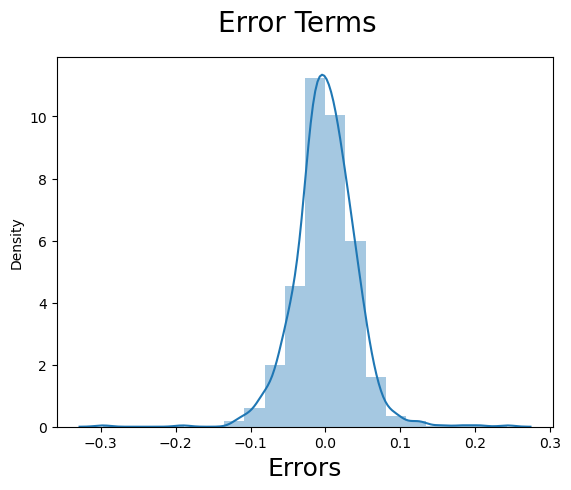

In [253]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_rfe_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

In [254]:
## Polynomial Regression 

In [255]:
poly = PolynomialFeatures(3) # Want to generate features with degree less than or equal to
                             # the specified degree
Y = poly.fit_transform(X_train_rfe_sm) # Transform the variable X to 1, X, X^2, X^3
print(Y)

[[1.         1.         0.35190647 ... 0.         0.         0.        ]
 [1.         1.         0.35541746 ... 0.         0.         0.        ]
 [1.         1.         0.10385507 ... 0.         0.         0.        ]
 ...
 [1.         1.         0.34818482 ... 0.         0.         0.        ]
 [1.         1.         0.26033986 ... 0.         0.         0.        ]
 [1.         1.         0.2164525  ... 0.         0.         0.        ]]


In [256]:
# Building the polynomial regression model with degree 5
degree=2 # got this number through trial and this is the lowest value which fit the data perfectly
polyreg5 = PolynomialFeatures(degree)
X_poly5 = polyreg5.fit_transform(X_train_rfe_sm) # Transform the variable X to 1, X, X^2, X^3, X^4, X^5
linreg5 = LinearRegression()
linreg5.fit(X_poly5, y_train)

LinearRegression()

In [257]:
y_pred5 = linreg5.predict(polyreg5.fit_transform(X_train_rfe_sm)) # store predictions from the polynomial regression in the variable y_pred5
print(r2_score(y_train, y_pred5))

0.9962741861927071


In [258]:
# Metrics to assess model performance
rss = np.sum(np.square(y_train - y_pred5))
print(rss)
mse = mean_squared_error(y_train, y_pred5)
print(mse)
rmse = mse**0.5
# Root Mean Squared Error
print(rmse)

0.08706967258721635
9.223482265594952e-05
0.009603896222676999


In [259]:
# Ridge Regression

In [260]:
# Applying Ridge Regression with varying the hyperparameter 'lambda'

X_seq = np.linspace(X_train_rfe_sm.min(),X_train_rfe_sm.max(),300).reshape(-1,1) # values to be considered for predictor variable
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000] # Higher the value of lambda, 
                                                  # more the regularization
for i in lambdas: # for each lambda we get different model coefficients
    degree = 3 # Degree for polynomial regression - chose 5 since this is the lowest number that gave a perfect fit
    # Creating degree 5 features
    ridgecoef = PolynomialFeatures(degree)
    # Transforming input features to polynomial features (1, x1, x2, x3, x4, x5)    
    X_poly = ridgecoef.fit_transform(X_train_rfe_sm)
    ridgereg = Ridge(alpha = i) # Initialize the Ridge Regression model with a specific lambda
    ridgereg.fit(X_poly, y_train) # fit the model on the polynomial features
    

    #Computing the r2 score
    y_pred = ridgereg.predict(ridgecoef.fit_transform(X_train_rfe_sm))
    print("r2 score = " + str(r2_score(y_train, y_pred))) 
    print(ridgereg.coef_) # model coefficients

/Users/siddmoha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


r2 score = 0.9999940485575403
[ 0.          0.         -0.26161614 ... -0.04885625 -0.04885625
 -0.05000026]
r2 score = 0.9994708418319661
[ 0.00000000e+00  0.00000000e+00 -3.14456066e-02 ... -2.47768301e-04
 -2.47768301e-04 -5.58883842e-05]
r2 score = 0.9988793689603175
[ 0.          0.         -0.00941844 ...  0.00175039  0.00175039
  0.00096264]
r2 score = 0.9973045556168839
[ 0.          0.          0.00199123 ... -0.00011896 -0.00011896
  0.00171661]
r2 score = 0.9932566969526617
[ 0.          0.          0.00348317 ... -0.0018541  -0.0018541
  0.00338802]
r2 score = 0.9811910014436508
[ 0.          0.          0.00319465 ... -0.00197784 -0.00197784
  0.00314334]
r2 score = 0.9569389036913449
[ 0.          0.          0.00216768 ... -0.00061811 -0.00061811
  0.00197527]
r2 score = 0.887081882519241
[ 0.          0.          0.0012044  ... -0.00018288 -0.00018288
  0.00125989]


In [261]:
### Lasso Regression

In [262]:
# Applying Lasso Regression with varying the hyperparameter 'lambda'

lambdas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in lambdas:
    degree = 1
    # Creating degree 5 features
    lassocoef = PolynomialFeatures(degree)
    # Transforming input features to polynomial features (1, x1, x2, x3, x4, x5)
    X_poly = lassocoef.fit_transform(X_train_rfe_sm)
    lassoreg = Lasso(alpha = i)
    lassoreg.fit(X_poly, y_train)

    
    # Compute R^2 
    y_pred = lassoreg.predict(lassocoef.fit_transform(X_train_rfe_sm))
    print("r2 score = " + str(r2_score(y_train, y_pred)))
    print(lassoreg.coef_)

r2 score = 0.8915546049482053
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  7.85854624e-02
  1.37319529e-01  0.00000000e+00  3.12762872e-01  4.39296706e-02
  8.42638075e-02 -4.66459824e-02  0.00000000e+00 -0.00000000e+00
  1.93114800e-02 -1.44450463e-03  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  1.96721933e-02
 -1.72590045e-02  0.00000000e+00 -0.00000000e+00 -2.17951436e-03
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -2.40090636e-03  0.00000000e+00 -1.04225890e-02
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -7.53098937e-03
 -0.00000000e+00 -0.00000000e+00  1.15778416e-02  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -1.05803650e-04 -3.80720739e-02
 -0.00000000e+00 -0.00000000e+00 -1.27380576e-02 -0.00000000e+00
 -0.00000000e+00  3.46039088e-02 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  6.33842838e-02 -0.00000000